# Customers Churn


Customers churn refers to the amount of customers of a given company that stop using products or services during a certain time frame. One can calculate the churn rate by dividing the number of customers lost during that time period -- say a quarter -- by the number of existing customers at the beginning of that time period. For example, starting the quarter with 400 customers and ending with 380, the churn rate is 5% because 5% of your customers dropped off.

For Business Intelligence, this is one of the most important metrics to look at since loosing clients now-a-days is very easy, compared to retain the existing ones. Companies should aim for a churn rate that is as close to 0% as possible. In order to do this, the company has to be on top of its churn rate at all times and treat it as a top priority.

3 Ways to Reduce Customer Churn
1. Focus the attention on the best customers.
Rather than simply focusing on offering incentives to customers who are considering churning, it could be even more beneficial to pool the resources into the loyal, profitable customers.

2. Analyze churn as it occurs.
Use the churned customers as a means of understanding why customers are leaving. Analyze how and when churn occurs in a customer's lifetime with the company, and use that data to put into place preemptive measures.

3. Show the customers that you care.
Instead of waiting to connect with the customers until they reach out to you, try a more proactive approach. Communicate with them all the perks you offer and show them you care about their experience, and they'll be sure to stick around.


In this project, I will use several tools from Survival Analysis to focus on a customer retention program from the Telco company (https://www.telco.com/company-profile). Each row represents a customer, each column contains customer's attributes described on the column Metadata. 

The data set includes information about:
1. Customers who left within the last month: the column is called Churn
2. Services that each customer has signed up for: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer's account information: how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers: gender, age range, and if they have partners and dependents

In [1]:
# Importing basic modules for data manipulations

import pandas as pd
import numpy as np

# Reading the dataset
dataframe = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# I have changed the name of some columns for a better aesthetic
dataframe = dataframe.rename(columns={'customerID': 'Client', 'gender': 'Gender', 'tenure': 'Tenure'})
dataframe['SeniorCitizen'] = dataframe['SeniorCitizen'].replace([0,1],('No','Yes'))
dataframe['Churn'] = dataframe['Churn'].replace(['Yes','No'],[1,0])
#There were some formatting errors in Total Charges, so I correct them
dataframe['TotalCharges'] = dataframe['TotalCharges'].replace(' ', np.NaN)
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'])
dataframe

Client  Gender SeniorCitizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 21 columns]

The database counts with 7043 entries and 21 columns. In the next cell I will run a quick report to have a global statistical view of the data and look for existing caveats. I will run this quick report with the library Pandas-Profiling which can be installed following the steps in https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/installation.html.

The variable description is:

1. 'Client': A unique ID that identifies each customer
2. 'Gender': The customer’s gender (Male, Female)
3. 'SeniorCitizen': Indicates if the customer is 65 or older (Yes, No)
4. 'Partner': Indicates if the customer is married (Yes, No)
5. 'Dependents': Indicates if the customer lives with any children, parents, etc. (Yes, No)
6. 'Tenure': The total amount of months that the customer has been with the company 
7. 'PhoneService': Indicates if the customer subscribes to home phone service with the company (Yes, No)
8. 'MultipleLines': Customer subscribed to multiple telephone lines with the company: Yes, No, No phone service
9. 'InternetService': Customer subscribed to Internet service with the company (No, DSL, Fiber Optic, Cable)
10. 'OnlineSecurity': Customer subscribed to an additional online security service (Yes, No)
11. 'OnlineBackup': Customer subscribed to an additional online backup service (Yes, No)
12. 'DeviceProtection': Customer subscribed to an additional device protection plan (Yes, No)
13. 'TechSupport': Customer subscribed to an additional technical support plan (Yes, No)
14. 'StreamingTV': Customer uses their Internet service to stream television programing (Yes, No)
15. 'StreamingMovies': Customer uses their Internet service to stream movies (Yes, No)
16. 'Contract': Indicates the customer’s current contract type (Month-to-Month, One Year, Two Year)
17. 'PaperlessBilling': Customer has chosen paperless billing (Yes, No)
18. 'PaymentMethod': Customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check)
19. 'MonthlyCharges': Customer's current total monthly charge for all their services from the company.
20. 'TotalCharges': Customer's total charges, calculated to the end of the quarter specified above.
21. 'Churn': The customer left/remained with the company 1/0.

In [2]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dataframe, title='Pandas Profiling Report')
profile

1. I see 11 missing data: I will remove them from the database
2. I see no duplicated data
3. The variable TotalCharges is uniformly distributed
4. There are binary, categorical and continuos variables
5. The outcome variables are Tenure and Churn

# Data Analytics: univariable analysis

In this subsection I will build a function to do a combined plot to show the most distribution of values of every variable (bar plot) and the total number of customer that churned. This will help me understand what are the risk factors for a customer to churn. A multivariable analysis will complete this study as it will take into account variable interactions. I will do a multivariable analysis in the next section.

In [3]:
#Data visualization
import matplotlib    #Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)                #Use big fonts and big plots
plt.rcParams['figure.figsize'] = (10.0,10.0)    
matplotlib.rc('figure', facecolor='white')

import seaborn as sns #Importing Seaborn

def Data_Analytics(df,colname,targetname):
    ### This function checks the target value difference of a given cathegory in the case
    ### of binary classifications.
    
    ## Arguments:
    # df: is a data frame.
    # colname: is a string. The column name to be evaluated.
    # targetname: is a string. The column name of the target variable.
    
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum', 'mean'])
    df_cate.reset_index(inplace=True)
    #print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(20, 8))
    plt1 = sns.lineplot(x=colname, y="sum", data=df_cate,color="b")
    plt.xticks(size=18,rotation=90)
    plt.yticks(size=20,rotation=0)
    
    for tl in ax.get_yticklabels():
        tl.set_color('b')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

## The gender of the client?

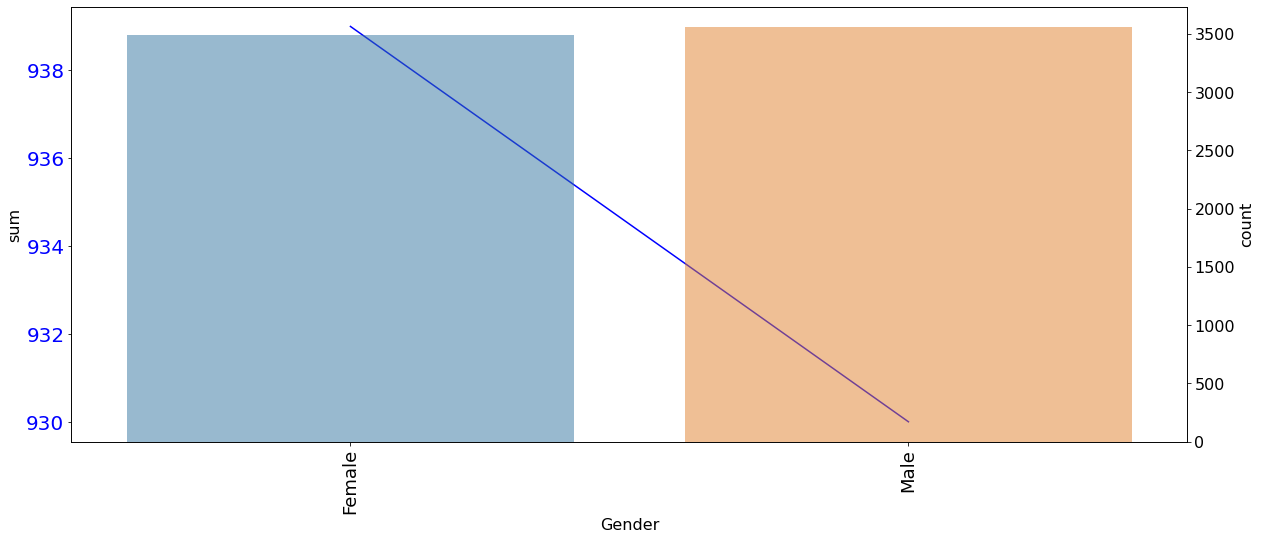

In [4]:
Data_Analytics(dataframe,'Gender','Churn')

In the above graphic is shown the distribution of the Gender variable as an histogram. The blue line represents the total number of customers from each class that churned. There are slightly more Men than Women as customers. Women churned the most.

## The age of the client?

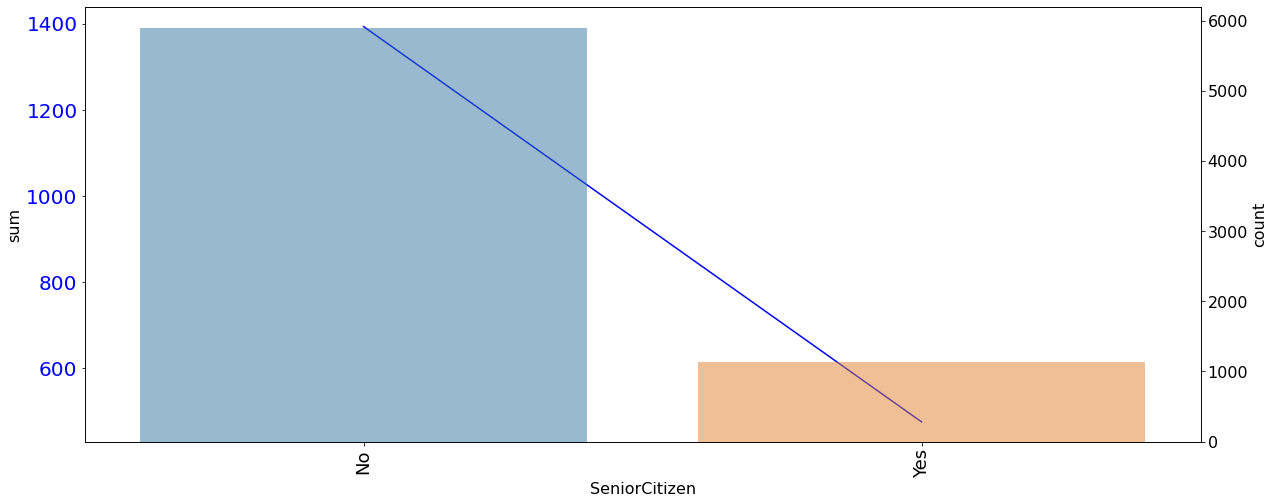

In [5]:
Data_Analytics(dataframe,'SeniorCitizen','Churn')

In the above graphic is shown that most of the customers are less than 65 years. Non-senior customers churned the most.

## The civil status of the client?

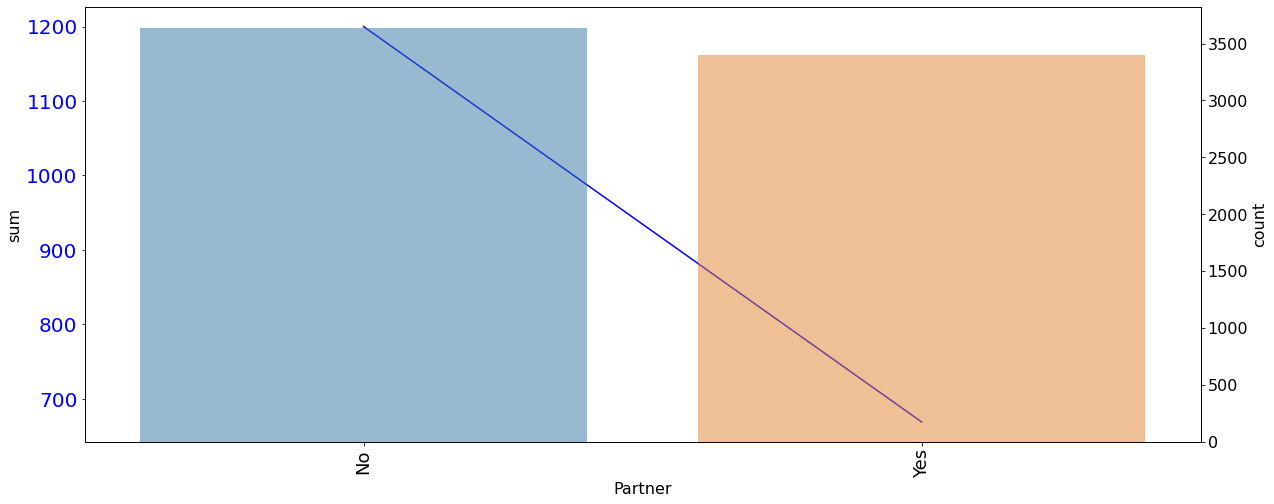

In [6]:
Data_Analytics(dataframe,'Partner','Churn')

There are slightly more single customers than partnered ones. Not married customers churned the most.

## The client has dependents?

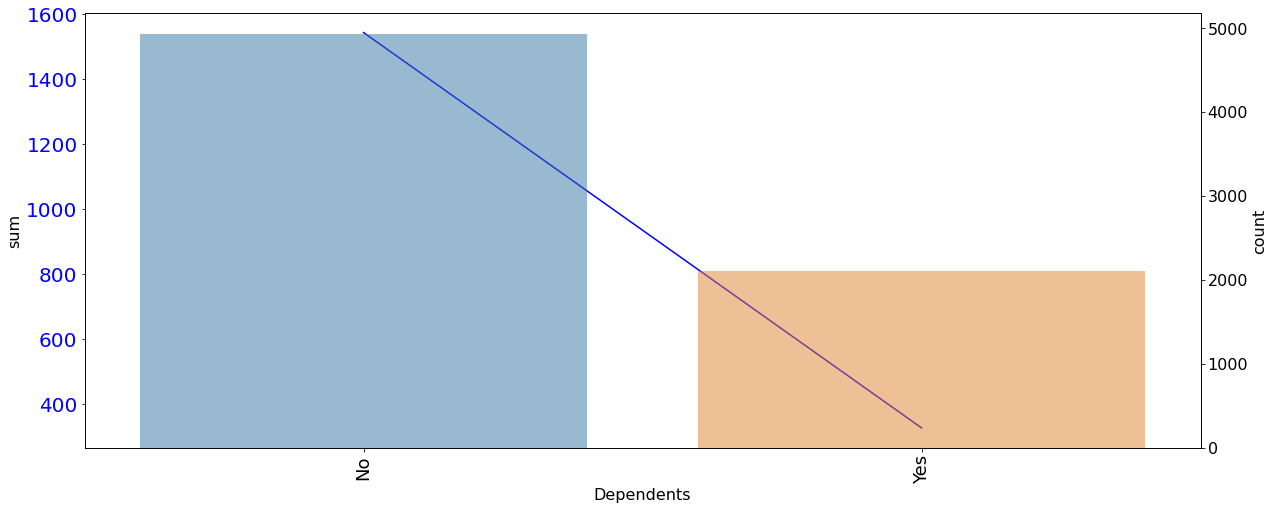

In [7]:
Data_Analytics(dataframe,'Dependents','Churn')

There are more independent customers than dependen. From both groups, independents churned the most.

## The months the customers stayed with the company?

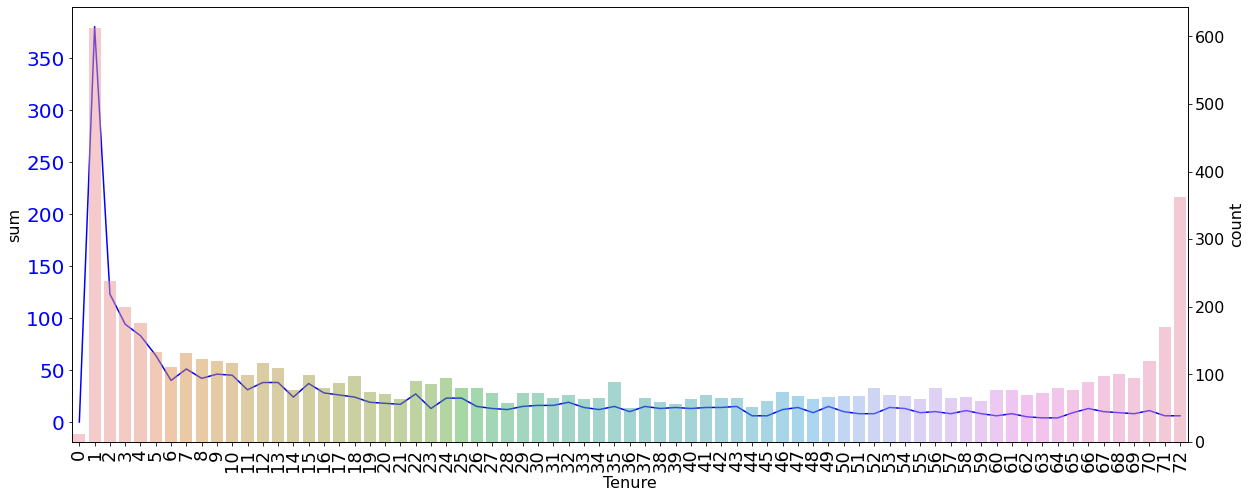

In [8]:
Data_Analytics(dataframe,'Tenure','Churn')

In the above graphic, as an histogram, is shown how many months the customers stayed with the company. Most of them churned during the first month.

## The customer having a phone service?

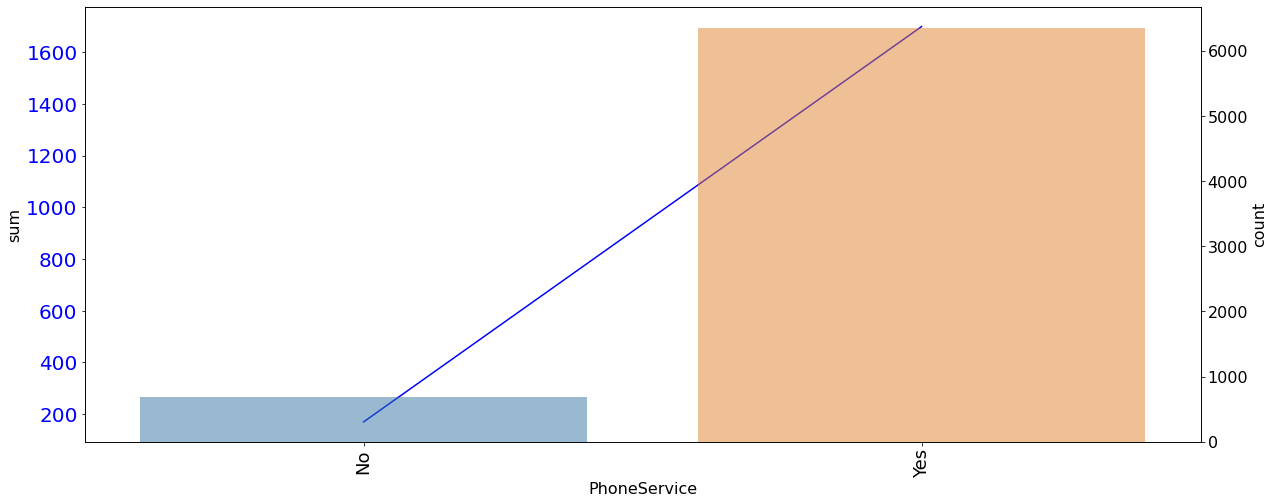

In [9]:
Data_Analytics(dataframe,'PhoneService','Churn')

Most of the customers subscribed to a home phone service with the company, and they are the most that churned. 

## The customer having a multiple line services?

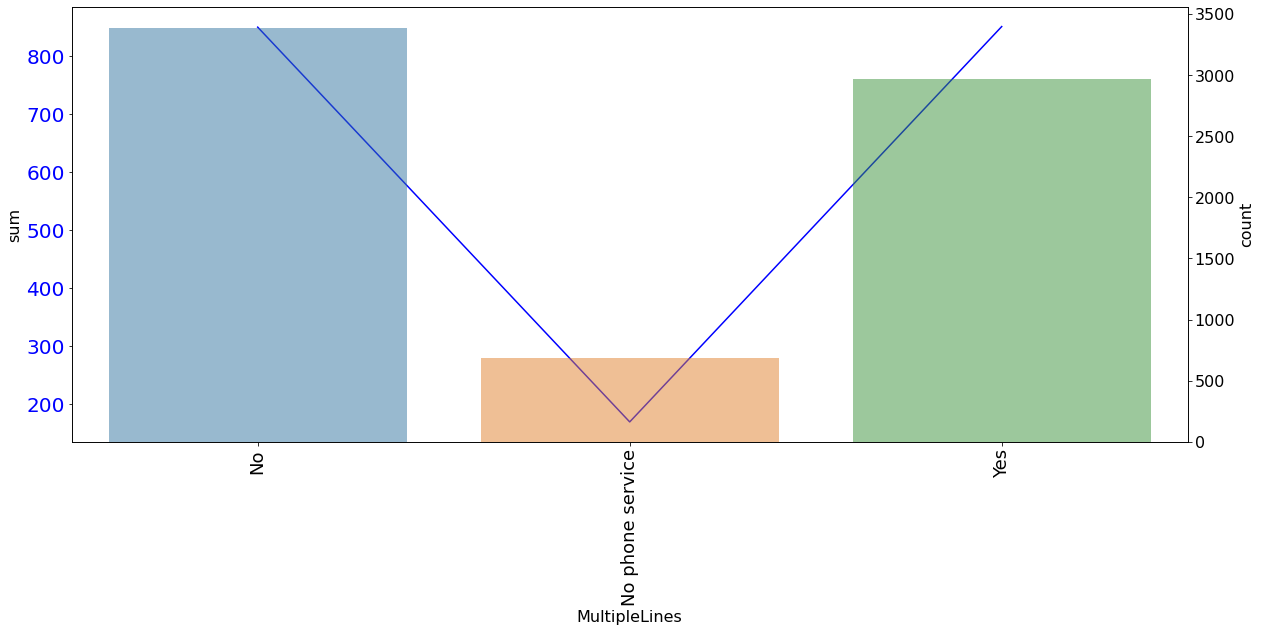

In [10]:
Data_Analytics(dataframe,'MultipleLines','Churn')

More than 3000 customers don't have multiple line services, while around 3000 have. They are the ones that churned the most.

## Which internet service does the customer have?

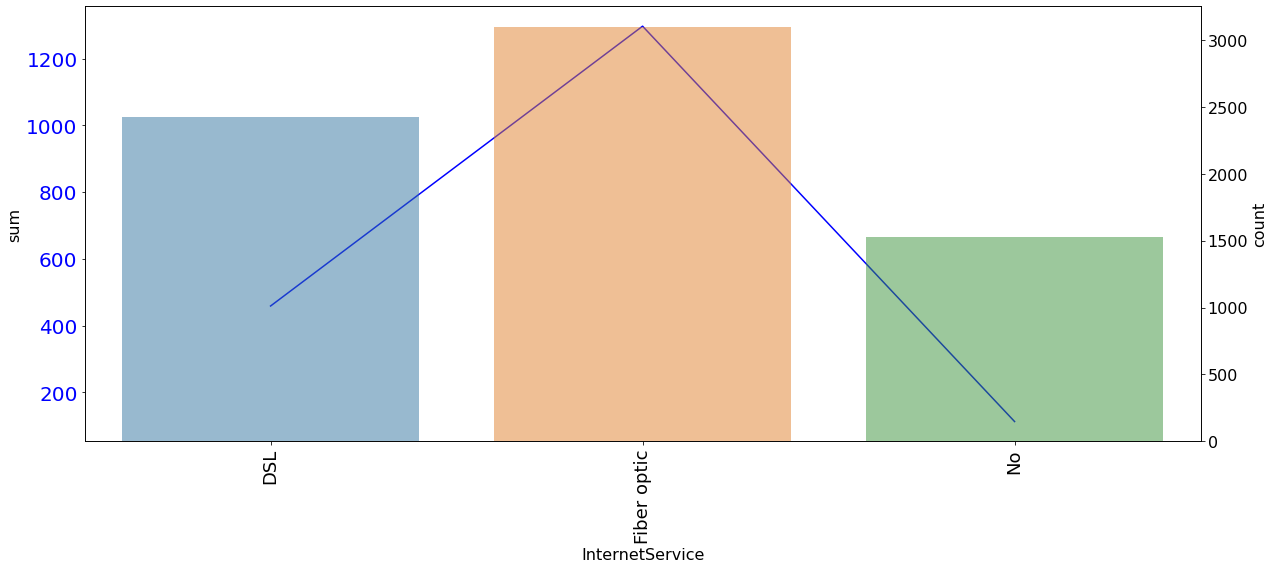

In [11]:
Data_Analytics(dataframe,'InternetService','Churn')

Customers subscribed mostly to Fiber Optic. They churned the most, followed by the ones that subscribed DSL.

## Online security?

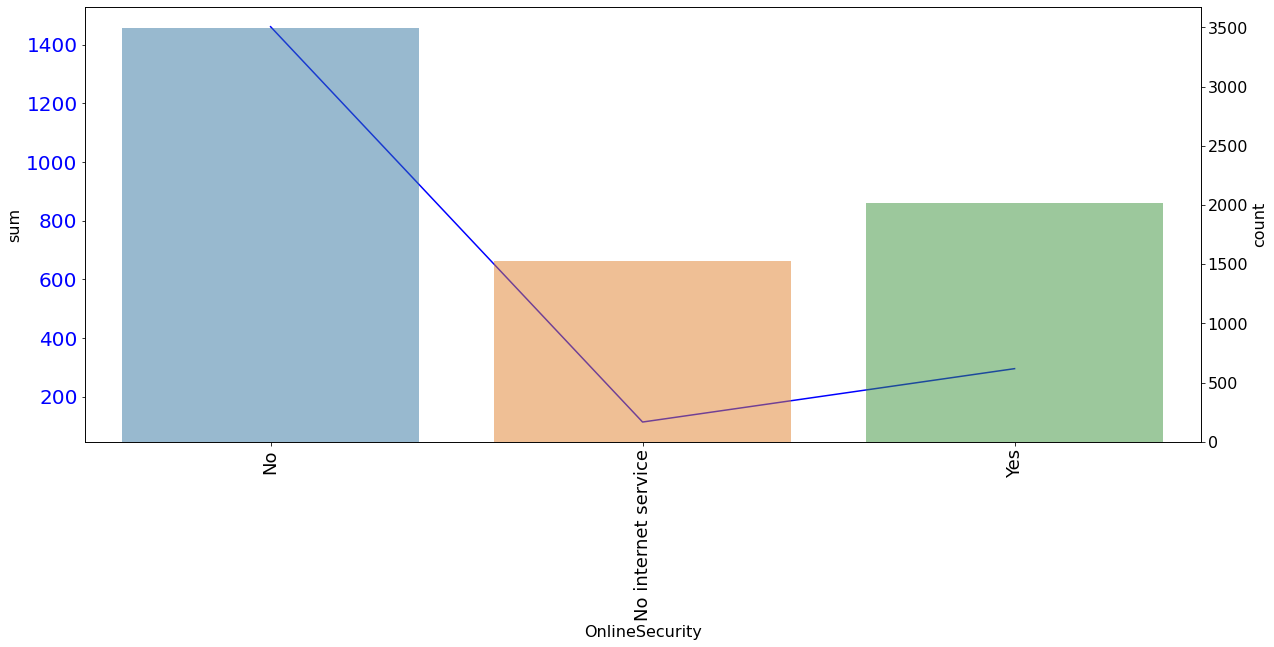

In [12]:
Data_Analytics(dataframe,'OnlineSecurity','Churn')

Most of the customers that didn't subscribe to an additional online security service churned.

## OnlineBackup

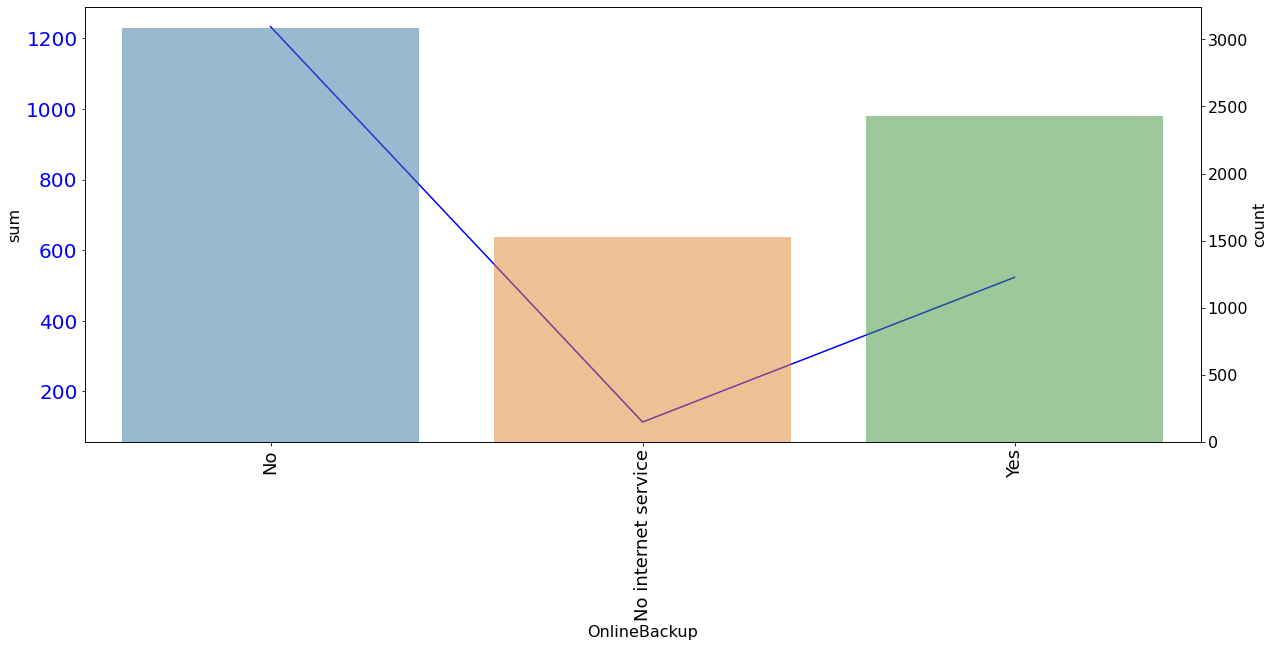

In [13]:
Data_Analytics(dataframe,'OnlineBackup','Churn')

Most of the customers that didn't subscribe to an additional online backup service, churned.

## DeviceProtection

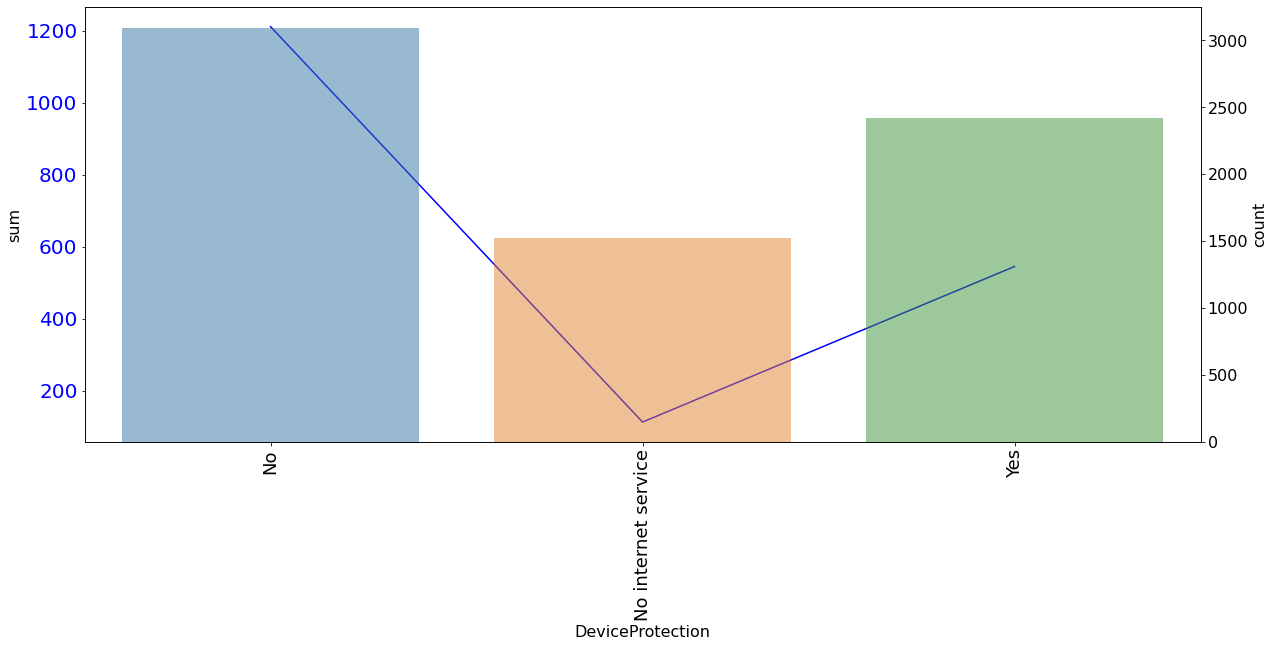

In [14]:
Data_Analytics(dataframe,'DeviceProtection','Churn')

Most of the customers that didn't subscribe to an additional device protection plan, churned.

## Tech Support

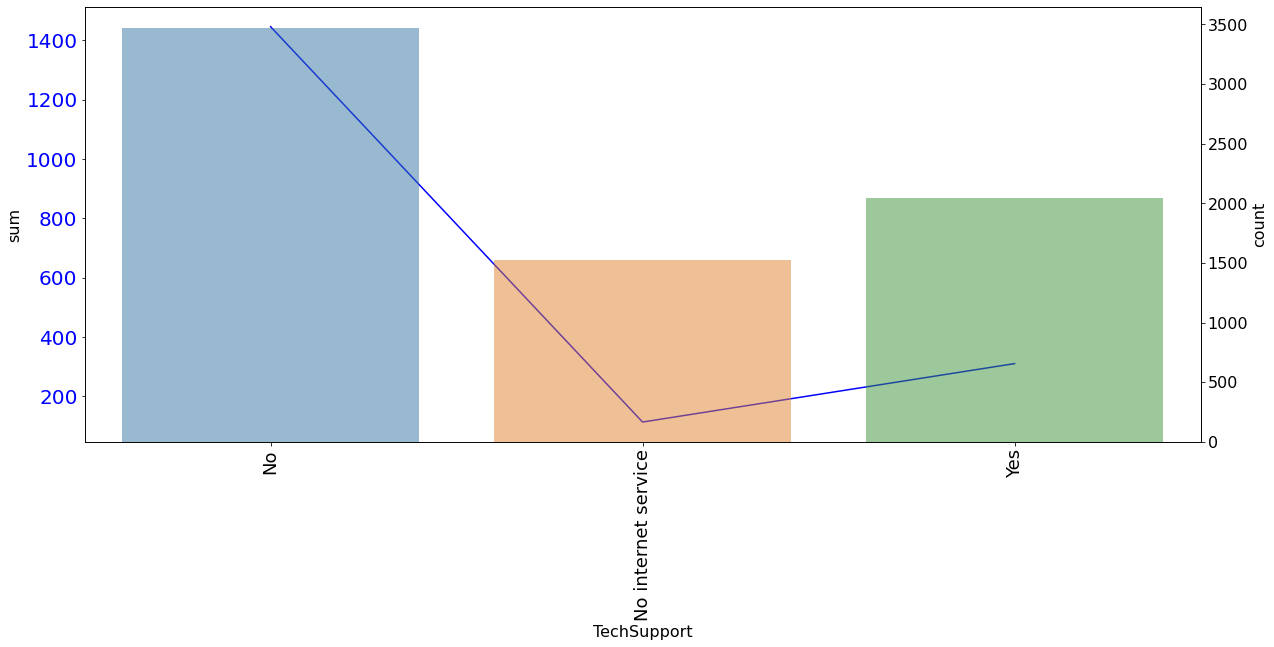

In [15]:
Data_Analytics(dataframe,'TechSupport','Churn')

Most of the customers that didn't subscribe to an additional technical support plan, churned.

## Streaming TV

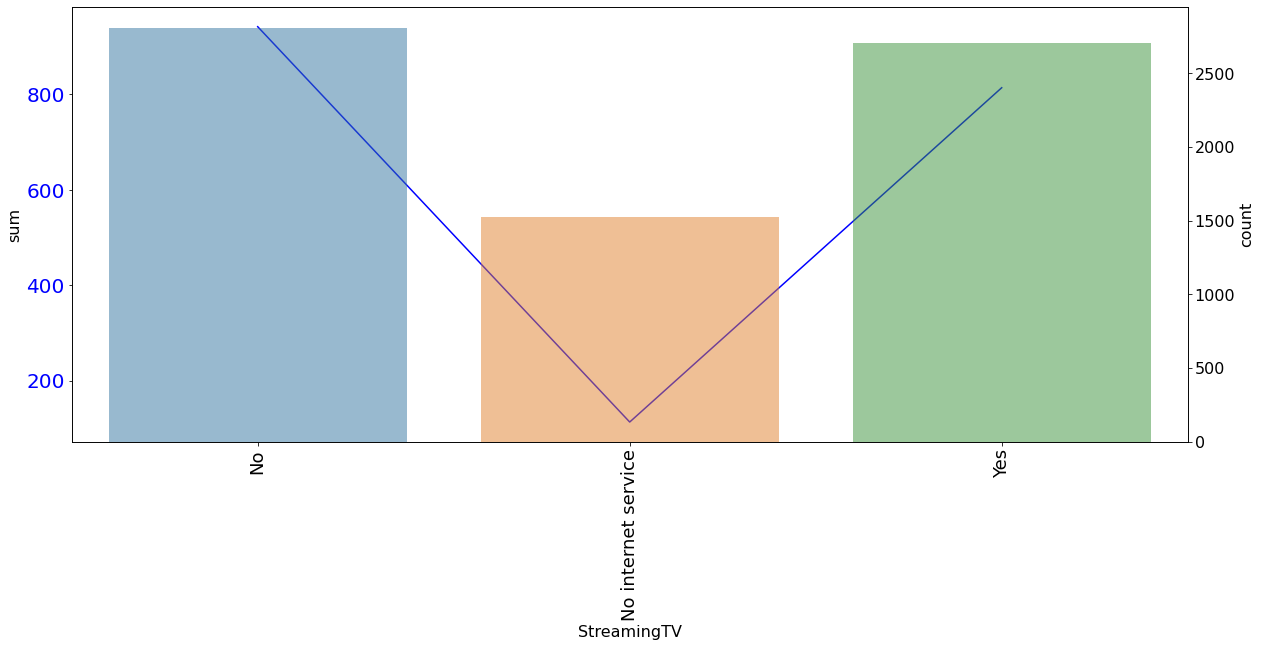

In [16]:
Data_Analytics(dataframe,'StreamingTV','Churn')

Most of the customer that don't use their Internet service to stream television programing, churned, followed by the ones who do.

## Streaming Movies

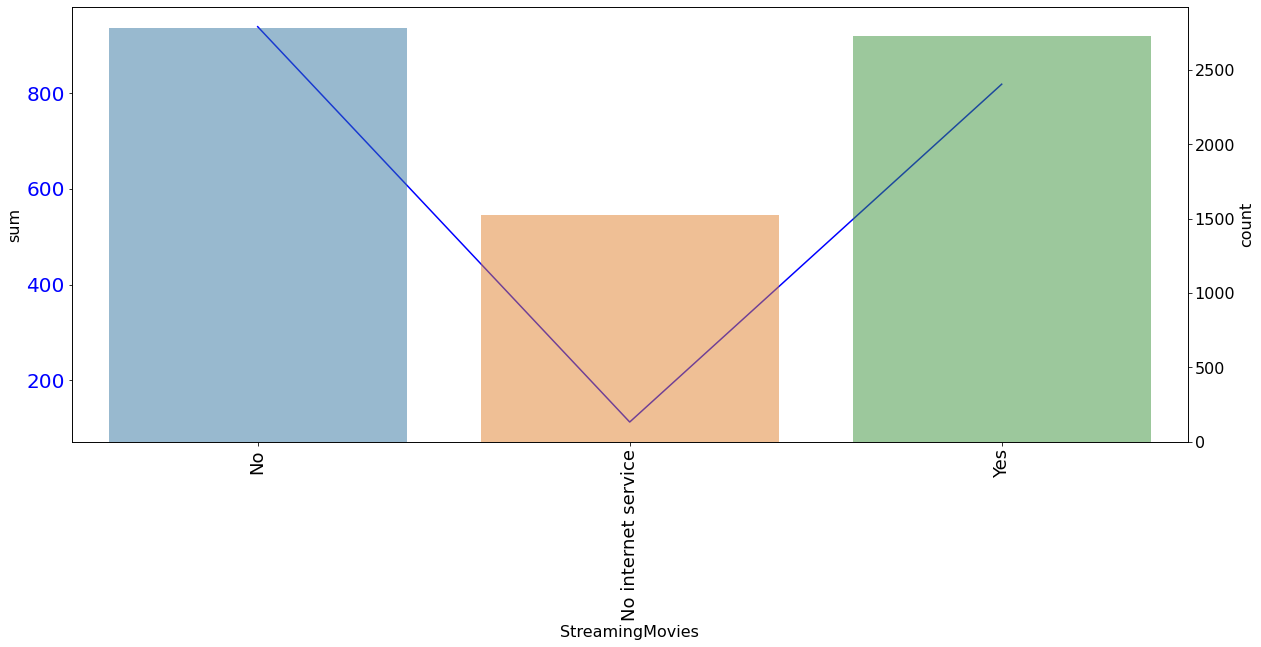

In [17]:
Data_Analytics(dataframe,'StreamingMovies','Churn')

Most of the customer that don't use their Internet service to stream movies, churned, followed by the ones who do.

## Contract

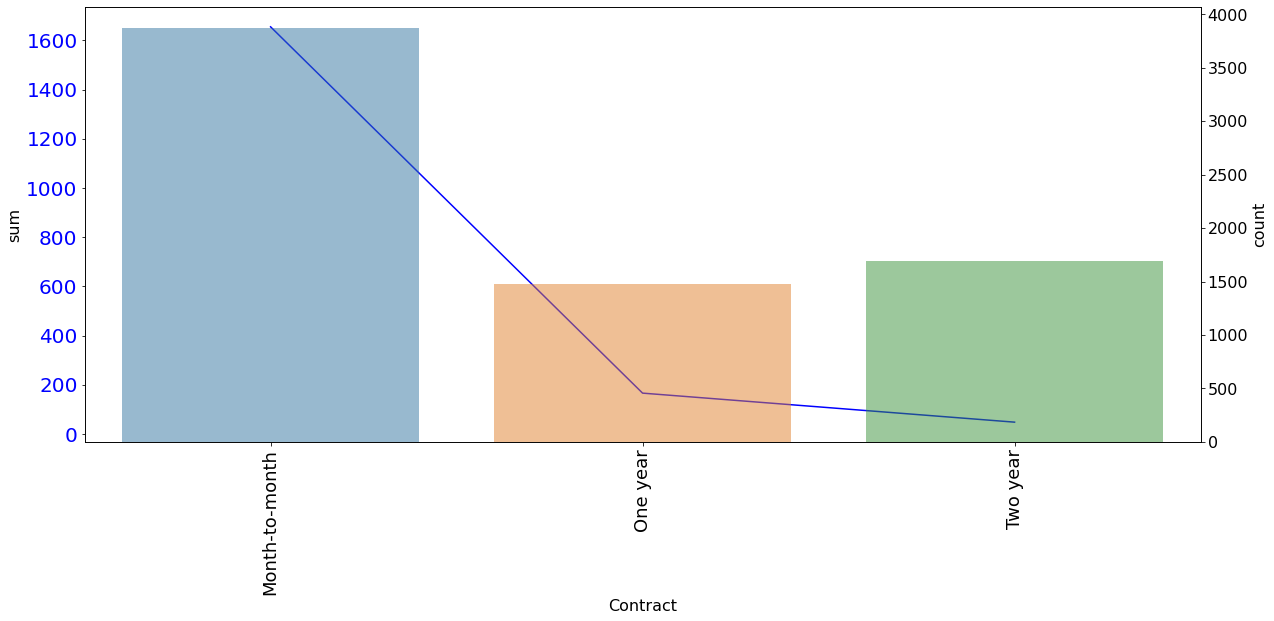

In [18]:
Data_Analytics(dataframe,'Contract','Churn')

Most of the customers have a Month-to-Month type of contract, followed by the ones that have Two-years contract. The first churned the most, followed by the ones with One-year contract.

## Paperless Billing

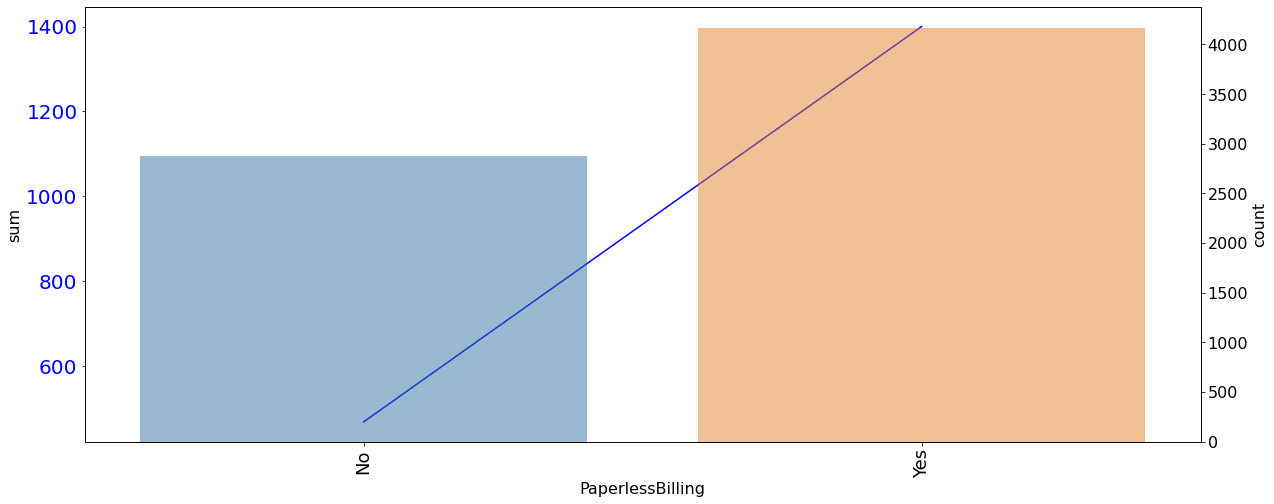

In [19]:
Data_Analytics(dataframe,'PaperlessBilling','Churn')

Most of the customer that have chosen paperless billing, churned.

## Payment Method

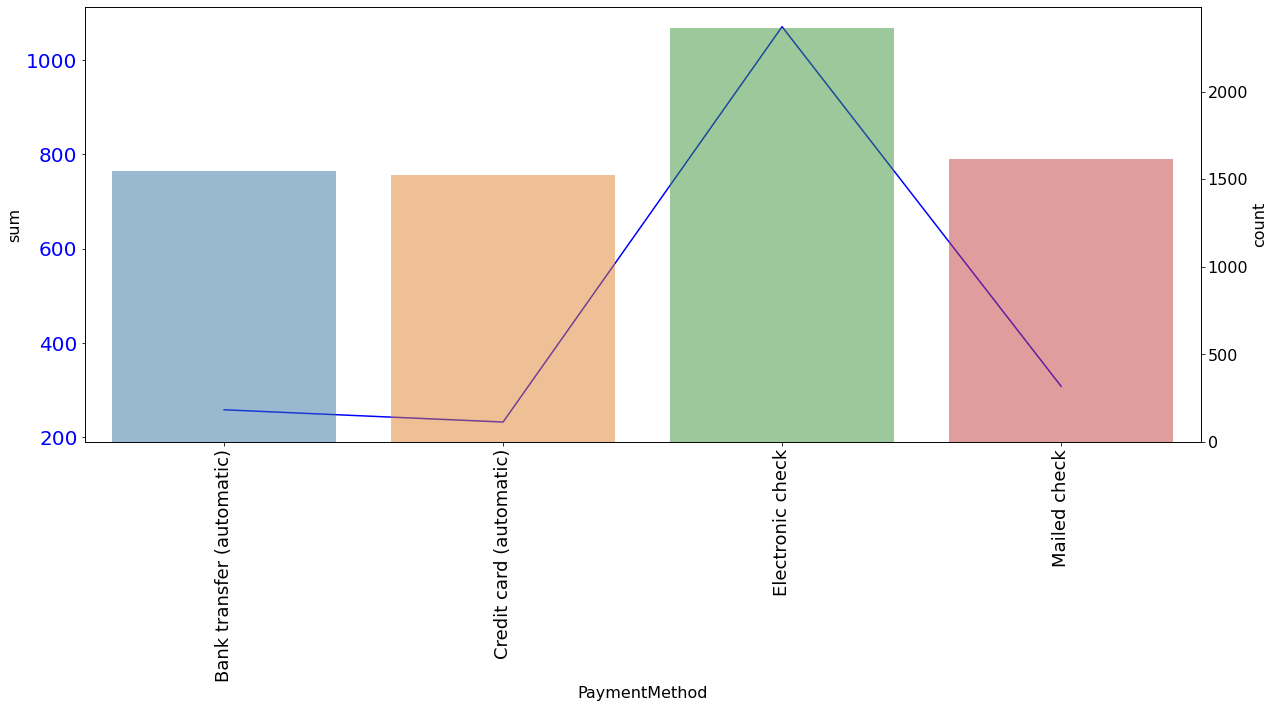

In [20]:
Data_Analytics(dataframe,'PaymentMethod','Churn')

Most of the customers that pay with Electronic Check, churned.

# Missing data

I will remove customers with variables with missing data.

In [21]:
dataframe = dataframe.dropna()
dataframe

Client  Gender SeniorCitizen Partner Dependents  Tenure  \
0     7590-VHVEG  Female            No     Yes         No       1   
1     5575-GNVDE    Male            No      No         No      34   
2     3668-QPYBK    Male            No      No         No       2   
3     7795-CFOCW    Male            No      No         No      45   
4     9237-HQITU  Female            No      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            No     Yes        Yes      24   
7039  2234-XADUH  Female            No     Yes        Yes      72   
7040  4801-JZAZL  Female            No     Yes        Yes      11   
7041  8361-LTMKD    Male           Yes     Yes         No       4   
7042  3186-AJIEK    Male            No      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7032 rows x 21 columns]

# Censored data

One thing to have in mind is that, the variable 'Tenure' measures the time in months that the customer has been with the company reaches its maximum at 72 months, and customers like '2234-XADUH' haven't churned yet. I see as well that customers like '7590-VHVEG', '5575-GNVDE', '7795-CFOCW' and many others didn't churn at 1, 34, 45 months, which means that since the maximum information we know about the customers dates till 74 months, those customers that didn't churn but have Tenure less than 75 months, were lost from follow-up, which means that they stopped using the services of the company but they never registered the rupture of the contract within the 75 months, or they died, etc. 

This is known as censorship and suddenly complicates the prediction methods as one cannot apply classical Machine Learning models, but only those adapted to Survival Analysis.

In the next section I will use a classical and very powerful model for such a task, know as the Cox's Proportional Hazard Model.

The next function allows to censor the database up to a time of study, for example, up to three, five or seven years.
Feel free to use it to stop the study at a given 'censor' time and make predictions up to that moment in time.

In [22]:
def time_censoring(df,timeline,censor,event):
    # Inputs: a dataframe
    #         the name of the colum of the time-to-event
    #         the time one needs to censor
    #         the the name of the event column
    
    #Makes a copy of the input dataframe to not overwrite values
    data_frame = df.copy()
    
    # Censures the time-to-event column
    censored_times = [min(el,censor) for el in data_frame[timeline]]
    data_frame[timeline] = censored_times
    
    # Censures the event column
    data_frame[event] = np.where(data_frame[event] == 0, 0,
                                 np.where(data_frame[timeline] >= censor, 0, 1)) 
    
    # Returns the censored dataframe
    return data_frame

# Churn Risk Modelling using the Cox model

In this section I will split the data set into training and testing subsamples. The idea is to produce a model, using the Cox Proportional Hazard Model with the training subsample, and later validate it with the test subsample. The model I am developing is a multivariable Cox. Categorical variables are further splitted into several classes and the model exaluates the risk factor of each class. I will produce a model and check the main risk factors on the training subsample. Then I will validate the model with the test subsample by computing the concordance index, which is equivalent to the ROC-AUC

## Train-Test-Split

In [23]:
from sklearn.model_selection import train_test_split

to_train, to_tests = train_test_split(dataframe, test_size=0.2)

## Cox Model check assumptions

The Cox model doesn't allow for collinear variables, which means that correlated variables should be eliminated before training the model or just to use a penalizer like Ridge, Lasso or ElasticNet. I will use only Ridge regularization scheme. For Ridge regularization: $l_1 = 0,$ I will use a penalization factor p=0.01 (feel free to change it if you need it).

The penalty term is: $\dfrac{p}{2}\left(\dfrac{1}{2}(1−l_{1})||𝛽||^2+l_{1}||𝛽||\right).$

In [25]:
from lifelines import CoxPHFitter

# Ridge regularization Cox Proportional Hazards model
formula = 'Gender+SeniorCitizen+Partner+Dependents+PhoneService+MultipleLines+InternetService+OnlineSecurity+OnlineBackup+DeviceProtection+TechSupport+StreamingTV+StreamingMovies+Contract+PaperlessBilling+PaymentMethod+MonthlyCharges+TotalCharges'
model = CoxPHFitter(penalizer=0.01, l1_ratio=0)
model = model.fit(to_train.drop("Client",axis=1), 'Tenure', event_col='Churn',formula=formula)
model.print_summary()

<lifelines.CoxPHFitter: fitted with 5625 total observations, 4136 right-censored observations>
             duration col = 'Tenure'
                event col = 'Churn'
                penalizer = 0.01
                 l1 ratio = 0
      baseline estimation = breslow
   number of observations = 5625
number of events observed = 1489
   partial log-likelihood = -10025.64
         time fit was run = 2021-02-27 09:01:59 UTC

---
                                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                        
Gender[T.Male]                            -0.08       0.92       0.05            -0.18             0.02                 0.84                 1.02
SeniorCitizen[T.Yes]                       0.06       1.06       0.06            -0.06             0.18                 0.94                 1.20
Partner[T.Yes]                            -0.22       0.80       0.06            -0.34            -0.11                 0.71                 0.90
Dependents[T.Yes]                         -0.12       0.89       0.08            -0.27             0.03                 0.76                 1.03
PhoneService[T.Yes]                        0.28       1.32       0.33            -0.37             0.92                 0.69                 2.51
MultipleLines[T.No phone service]         -0.28       0.76       0.33            -0.92             0.37                 0.40                 1.45
MultipleLines[T.Yes]                      -0.03       0.97       0.06            -0.15             0.09                 0.86                 1.09
InternetService[T.Fiber optic]             0.85       2.35       0.12             0.62             1.09                 1.86                 2.97
InternetService[T.No]                     -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
OnlineSecurity[T.No internet service]     -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
OnlineSecurity[T.Yes]                     -0.35       0.70       0.08            -0.50            -0.20                 0.61                 0.82
OnlineBackup[T.No internet service]       -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
OnlineBackup[T.Yes]                       -0.18       0.84       0.06            -0.30            -0.05                 0.74                 0.95
DeviceProtection[T.No internet service]   -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
DeviceProtection[T.Yes]                    0.01       1.01       0.06            -0.11             0.13                 0.89                 1.14
TechSupport[T.No internet service]        -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
TechSupport[T.Yes]                        -0.17       0.84       0.07            -0.31            -0.03                 0.73                 0.97
StreamingTV[T.No internet service]        -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
StreamingTV[T.Yes]                         0.25       1.29       0.07             0.12             0.39                 1.13                 1.48
StreamingMovies[T.No internet service]    -0.30       0.74       0.30            -0.89             0.29                 0.41                 1.34
StreamingMovies[T.Yes]                     0.20       1.22       0.07             0.06             0.34                 1.07                 1.40
Contract[T.One year]                      -0.98       0.37       0.10            -1.17            -0.80                 0.31                 0.45
Contract[T.Two year]                      -2.46       0.09       0.1

I see that the concordance index is of 93% which is excellent. Then the main risk factors are identified in the column coef or exp(coef); those factors with coef>0 or exp(coef)>1 represent the most sensible for the customers to churn. The risk factors coincide on average with the ones from the univariable analysis.

The advantage of this modelling procedure is that anytime we get the data of a new customer, we can predict the churning or not and estimate the amount of months before the churn, so the company has time to prepare a Business Plan for the customer. 

Text(0.5, 0, 'Hazard Ratios (95% CI)')

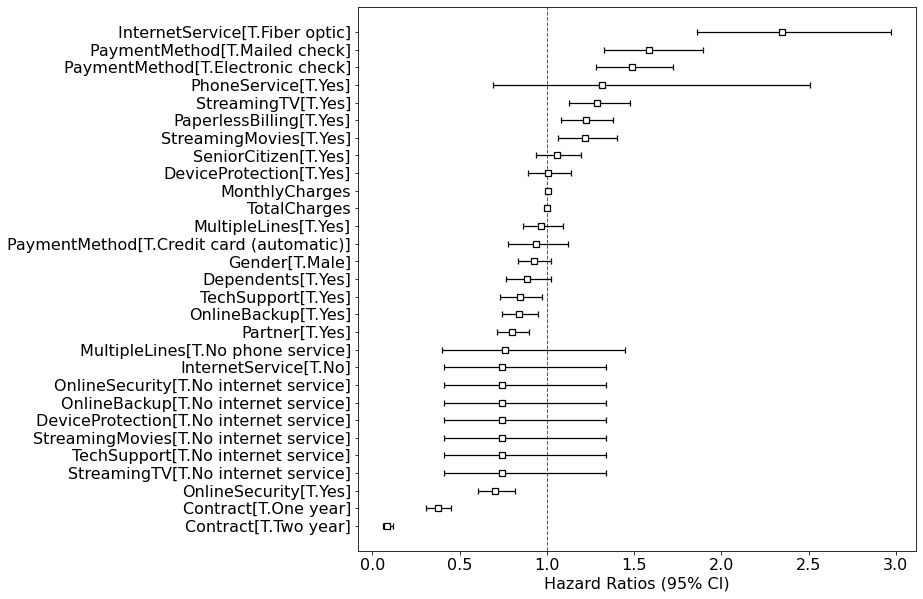

In [27]:
model.plot(hazard_ratios=True)
plt.xlabel('Hazard Ratios (95% CI)')

In the above graphic is shown the Hazard Ratios of every variable and independent factors, along with the 95% condifence intervals.

## Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.  

In [28]:
from lifelines.utils import concordance_index
C_index = concordance_index(to_tests['Tenure'],-model.predict_partial_hazard(to_tests.drop('Client',axis=1)),to_tests['Churn'])
print('The concordance of the Cox model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the Cox model on the test subsample is:  91.49 %


The concordance index for the test subsample is of 91.49% which is excellent.

## Surival Probabilities

I will plot now the probability in time that some of the customers don't leave the company.

I will use the Costumers with IDs: 5386-THSLQ, 7771-ZONAT and 7233-PAHHL-CLJTI.

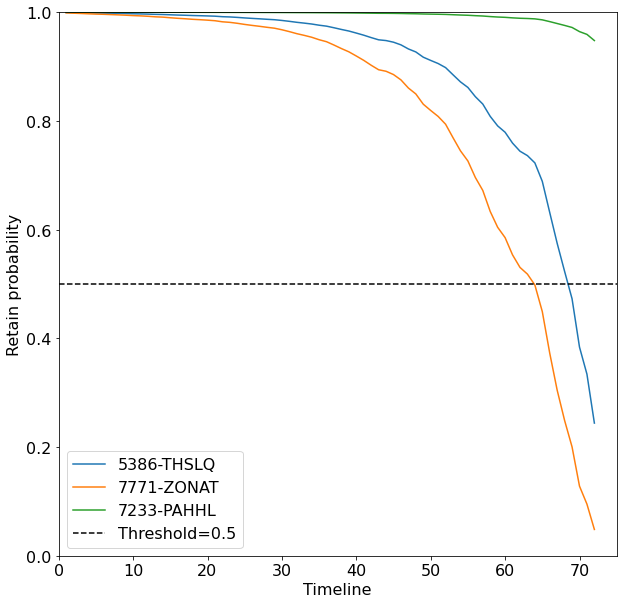

In [29]:
patients = [0,1,2]

rows_selected = to_tests.iloc[patients]
rows_selected = rows_selected.set_index('Client')

model.predict_survival_function(rows_selected).plot()
plt.plot([i for i in range(0,76)],[0.5 for i in range(0,76)],'k--', label='Threshold=0.5')
plt.ylim(0,1)
plt.xlim(0,75)
plt.xlabel('Timeline')
plt.ylabel('Retain probability')
plt.legend(loc='best')

In the x-axis is the Tenure variable that measures how many months the customer stayed with the company.
In the y-axis is the Survival Probability: the probability that the customer remains with the company.

# Machine Learning risk evaluation models

In this section I will use several enseble ML algorithms adapted to Survival Analysis, such as Random Survival Forest, Conditional Survival Forest and Extra Survival Trees, to predict client churn. They are all developed and integrated into the library Pysurvival: [https://square.github.io/pysurvival/], which is in continuous development.

I will transform the categorical variables into one-hot-vectors to extract churn factors and I will split the dataset into train and test subsamples with a ratio 80:20.  

In [32]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel
from pysurvival.models.survival_forest import ConditionalSurvivalForestModel
from pysurvival.models.survival_forest import ExtraSurvivalTreesModel


from pysurvival.utils.metrics import concordance_index
from pysurvival.utils import save_model
from pysurvival.utils import load_model

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


#Formatting the training data for the Lifelines and PySurvival libraries
dummies = pd.get_dummies(dataframe.drop(["Client"],axis=1), drop_first=True)
to_train, to_tests = train_test_split(dummies, test_size=0.2)

## Cross validation and optimization

In [255]:
def Cross_Validator(data_frame,timeline,event,n_split):
    
    #Defining number of trees for cross validation
    num_trees = [int(el) for el in list(np.linspace(10,300,30))]
    
    rsf_mean_c = []
    rsf_low_c = []
    rsf_upp_c = []
    
    csf_mean_c = []
    csf_low_c = []
    csf_upp_c = []
    
    est_mean_c = []
    est_low_c = []
    est_upp_c = []
    
    df = pd.DataFrame(columns=['Trees','C_index_RSF','Low_95CL_RSF','Up_95CL_RSF','C_index_CSF','Low_95CL_CSF','Up_95CL_CSF','C_index_EST','Low_95CL_EST','Up_95CL_EST'])
    
    for el in num_trees:
        C_index_array_rsf = []
        C_index_array_csf = []
        C_index_array_est = []
        
        for i in range(n_split):
            training, valid = train_test_split(data_frame, test_size=0.2)
            model_rsf = RandomSurvivalForestModel(num_trees = el)
            model_rsf = model_rsf.fit(training.drop([str(timeline),str(event)],axis=1),
                                      training[str(timeline)],
                                      training[str(event)],
                                      max_features = 'sqrt',
                                      num_threads = -1,
                                      importance_mode = 'normalized_permutation',
                                      save_memory=True)
            C_index_rsf = concordance_index(model_rsf, valid.drop([str(timeline),str(event)],axis=1),
                                            valid[str(timeline)], valid[str(event)])
            C_index_array_rsf.append(C_index_rsf)
            
            model_csf = ConditionalSurvivalForestModel(num_trees = el)
            model_csf = model_csf.fit(training.drop([str(timeline),str(event)],axis=1),
                                      training[str(timeline)],
                                      training[str(event)],
                                      max_features = 'sqrt',
                                      num_threads = -1,
                                      importance_mode = 'normalized_permutation',
                                      save_memory=True)
            C_index_csf = concordance_index(model_csf, valid.drop([str(timeline),str(event)],axis=1),
                                            valid[str(timeline)], valid[str(event)])
            C_index_array_csf.append(C_index_csf)
            
            model_est = ExtraSurvivalTreesModel(num_trees = el)
            model_est = model_est.fit(training.drop([str(timeline),str(event)],axis=1),
                                      training[str(timeline)],
                                      training[str(event)],
                                      max_features = 'sqrt',
                                      num_threads = -1,
                                      importance_mode = 'normalized_permutation',
                                      save_memory=True)
            
            C_index_est = concordance_index(model_est, valid.drop([str(timeline),str(event)],axis=1),
                                            valid[str(timeline)], valid[str(event)])
            C_index_array_est.append(C_index_est)
            
        c_mean_rsf = np.mean(C_index_array_rsf)
        c_mean_csf = np.mean(C_index_array_csf)
        c_mean_est = np.mean(C_index_array_est)
        
        low_c95_rsf = np.mean(C_index_array_rsf)-1.96*np.std(C_index_array_rsf)*np.sqrt(1.0/len(C_index_array_rsf))
        upp_c95_rsf = np.mean(C_index_array_rsf)+1.96*np.std(C_index_array_rsf)*np.sqrt(1.0/len(C_index_array_rsf))
        low_c95_csf = np.mean(C_index_array_csf)-1.96*np.std(C_index_array_csf)*np.sqrt(1.0/len(C_index_array_csf))
        upp_c95_csf = np.mean(C_index_array_csf)+1.96*np.std(C_index_array_csf)*np.sqrt(1.0/len(C_index_array_csf))
        low_c95_est = np.mean(C_index_array_est)-1.96*np.std(C_index_array_est)*np.sqrt(1.0/len(C_index_array_est))
        upp_c95_est = np.mean(C_index_array_est)+1.96*np.std(C_index_array_est)*np.sqrt(1.0/len(C_index_array_est))
        
        
        rsf_mean_c.append(c_mean_rsf)
        rsf_low_c.append(low_c95_rsf)
        rsf_upp_c.append(upp_c95_rsf)
        
        csf_mean_c.append(c_mean_csf)
        csf_low_c.append(low_c95_csf)
        csf_upp_c.append(upp_c95_csf)
        
        est_mean_c.append(c_mean_est)
        est_low_c.append(low_c95_est)
        est_upp_c.append(upp_c95_est)
        
        #print('Number of trees: ',el)
        #print('The mean (95 CL) C-index is :', c_mean,(low_c95,upp_c95))
    df['Trees'] = num_trees
    df['C_index_RSF'] = rsf_mean_c
    df['Low_95CL_RSF'] = rsf_low_c
    df['Up_95CL_RSF'] = rsf_upp_c
    df['C_index_CSF'] = csf_mean_c
    df['Low_95CL_CSF'] = csf_low_c
    df['Up_95CL_CSF'] = csf_upp_c
    df['C_index_EST'] = est_mean_c
    df['Low_95CL_EST'] = est_low_c
    df['Up_95CL_EST'] = est_upp_c
    return df

In [256]:
ensemble_dataframe = Cross_Validator(to_train,'Tenure','Churn',5)
ensemble_dataframe.to_csv('ensemble_dataframe.csv')
ensemble_dataframe

Trees  C_index_RSF  Low_95CL_RSF  Up_95CL_RSF  C_index_CSF  Low_95CL_CSF  \
0      10     0.871150      0.856613     0.885687     0.865706      0.855522   
1      20     0.879631      0.868799     0.890462     0.875730      0.858382   
2      30     0.881282      0.875863     0.886701     0.868883      0.861399   
3      40     0.881696      0.866423     0.896968     0.875604      0.861243   
4      50     0.885699      0.877592     0.893805     0.880890      0.871240   
5      60     0.888437      0.878370     0.898503     0.885772      0.876041   
6      70     0.888066      0.883828     0.892304     0.885868      0.878082   
7      80     0.893654      0.886856     0.900452     0.887643      0.881235   
8      90     0.888756      0.881788     0.895724     0.880384      0.870567   
9     100     0.885620      0.878755     0.892484     0.876723      0.872660   
10    110     0.887239      0.878550     0.895927     0.878720      0.866808   
11    120     0.890032      0.885672     0.894393     0.884582      0.880150   
12    130     0.892431      0.884067     0.900795     0.884579      0.872124   
13    140     0.896377      0.889897     0.902858     0.890947      0.883915   
14    150     0.881061      0.869475     0.892648     0.878863      0.866828   
15    160     0.886001      0.876817     0.895186     0.876971      0.867572   
16    170     0.891748      0.882036     0.901461     0.885801      0.874870   
17    180     0.881517      0.876605     0.886430     0.873745      0.869328   
18    190     0.882133      0.875498     0.888769     0.874994      0.866657   
19    200     0.879943      0.874775     0.885111     0.877066      0.872189   
20    210     0.883079      0.878994     0.887164     0.874556      0.869601   
21    220     0.889692      0.882335     0.897050     0.879557      0.872037   
22    230     0.888332      0.882448     0.894215     0.881202      0.877869   
23    240     0.889682      0.880315     0.899050     0.882553      0.872347   
24    250     0.887335      0.879108     0.895562     0.878958      0.870380   
25    260     0.886829      0.880516     0.893142     0.880013      0.872942   
26    270     0.884733      0.872889     0.896578     0.882224      0.869909   
27    280     0.893922      0.887803     0.900041     0.887978      0.880638   
28    290     0.888739      0.881706     0.895773     0.880266      0.872985   
29    300     0.890320      0.883274     0.897367     0.885003      0.875238   

    Up_95CL_CSF  C_index_EST  Low_95CL_EST  Up_95CL_EST  
0      0.875889     0.850700      0.842072     0.859328  
1      0.893079     0.872241      0.860790     0.883692  
2      0.876367     0.862997      0.856276     0.869719  
3      0.889965     0.871404      0.860826     0.881982  
4      0.890539     0.877850      0.869890     0.885811  
5      0.895504     0.880777      0.868746     0.892807  
6      0.893653     0.876575      0.871657     0.881492  
7      0.894052     0.878362      0.868794     0.887929  
8      0.890201     0.877533      0.867947     0.887118  
9      0.880786     0.869392      0.861569     0.877214  
10     0.890631     0.877388      0.867329     0.887447  
11     0.889014     0.876057      0.871332     0.880782  
12     0.897034     0.878941      0.868134     0.889748  
13     0.897979     0.883450      0.875872     0.891029  
14     0.890898     0.873611      0.861406     0.885816  
15     0.886370     0.871797      0.861747     0.881847  
16     0.896733     0.879378      0.869371     0.889385  
17     0.878162     0.864942      0.861375     0.868509  
18     0.883331     0.872688      0.865682     0.879695  
19     0.881943     0.871086      0.865153     0.877019  
20     0.879511     0.869916      0.867310     0.872523  
21     0.887077     0.875564      0.869317     0.881811  
22     0.884535     0.878233      0.874842     0.881624  
23     0.892760     0.877089      0.868369     0.885810  
24     0.887535     0.873434      0.866470     0.880397  
25     0.887084

## Plotting the Cross-Validated models

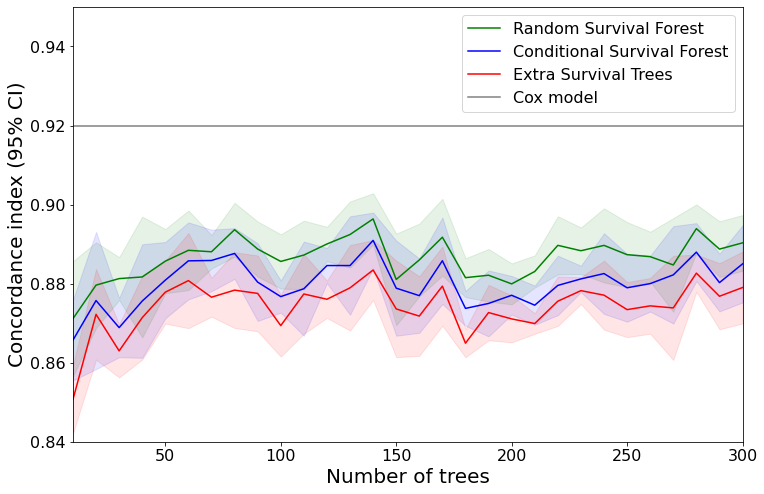

In [33]:
ensemble_dataframe = pd.read_csv('ensemble_dataframe.csv')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # To set figure sizes for big plots
plt.rcParams['axes.edgecolor'] = "black"

fig, ax = plt.subplots()
ax.plot(ensemble_dataframe['Trees'],ensemble_dataframe['C_index_RSF'], 'g', label = 'Random Survival Forest')
ax.fill_between(ensemble_dataframe['Trees'], ensemble_dataframe['Low_95CL_RSF'], ensemble_dataframe['Up_95CL_RSF'], color='g', alpha=.1)

ax.plot(ensemble_dataframe['Trees'],ensemble_dataframe['C_index_CSF'], 'b', label = 'Conditional Survival Forest')
ax.fill_between(ensemble_dataframe['Trees'], ensemble_dataframe['Low_95CL_CSF'], ensemble_dataframe['Up_95CL_CSF'], color='b', alpha=.1)

ax.plot(ensemble_dataframe['Trees'],ensemble_dataframe['C_index_EST'], 'r', label = 'Extra Survival Trees')
ax.fill_between(ensemble_dataframe['Trees'], ensemble_dataframe['Low_95CL_EST'], ensemble_dataframe['Up_95CL_EST'], color='r', alpha=.1)


ax.plot(ensemble_dataframe['Trees'],[0.92 for el in ensemble_dataframe['Trees']], 'grey', label = 'Cox model')

plt.xticks(rotation=0,fontsize=16)
plt.yticks(rotation=0,fontsize=16)
ax.set_xlabel('Number of trees',fontsize=20)    
ax.set_ylabel('Concordance index (95% CI)',fontsize=20)
plt.xlim(10,300)
plt.ylim(0.84,0.95)
plt.legend(loc='best',fontsize=16, fancybox=True, facecolor='white')
plt.grid(False)
ax.set_facecolor('white')
plt.savefig('C_index_vs_Trees.jpg',dpi=800)
plt.show()

I see that the average concordance index for the three models stabilizes above 100 trees.

## Random Survival Forest

In this subsection I will use the Random Survival Forest (Ishwaran et al. in 2008.) model to predict client churn. This is an extension of the classical Random Forest model to handle censored data.

In order to perform a multivariable analysis as I did before, it is necessary first to one-hot encode all the categorical variables to get the information of every factor that my influence the churn of customers.

I will fit the model with 250 trees and I will print the concordance index while training.

In [34]:
#Trains the model by fitting it to the train subsample
model_rsf = RandomSurvivalForestModel(num_trees = 250)
model_rsf = model_rsf.fit(to_train.drop(['Tenure','Churn'],axis=1),
                          to_train['Tenure'],
                          to_train['Churn'],
                          max_features = 'sqrt',
                          num_threads = -1,
                          importance_mode = 'normalized_permutation',
                          seed = 0,
                          save_memory=True)
    
C_index = concordance_index(model_rsf, to_train.drop(['Tenure','Churn'],axis=1), to_train['Tenure'], to_train['Churn'])     
print('The concordance of the Random Survival Forest model is: ', round(C_index*100,2),'%')

The concordance of the Random Survival Forest model is:  89.29 %


I see that the concordance is of about 89.29% which is not bad either, but lower than the Cox model.
In the following cell, I will evaluate the variable importance for the model, to spot the high risk factors.

Text(0, 0.5, 'Factors')

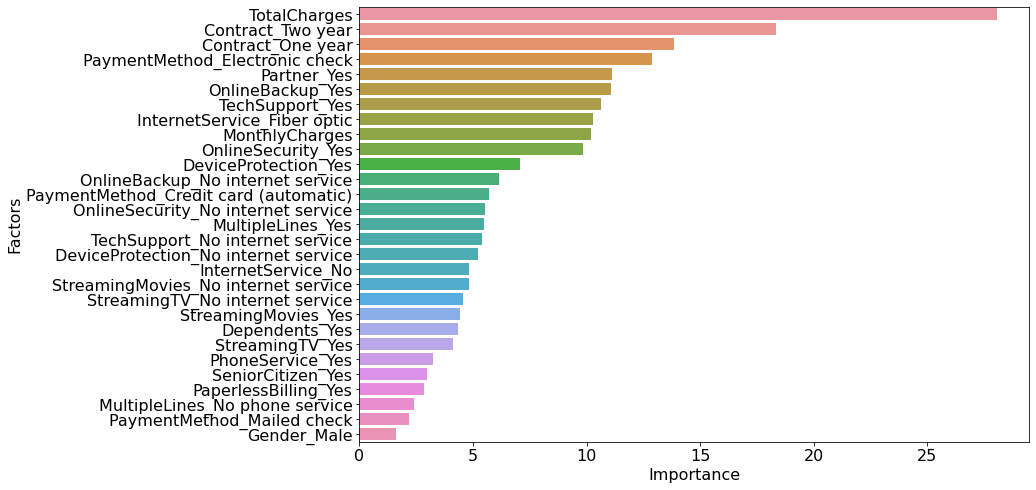

In [35]:
ax = sns.barplot(x='importance', y='feature', data=model_rsf.variable_importance_table)
ax.set_xlabel('Importance')
ax.set_ylabel('Factors')

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [36]:
C_index = concordance_index(model_rsf, to_tests.drop(['Tenure','Churn'],axis=1), to_tests['Tenure'], to_tests['Churn'])     
print('The concordance of the Random Survival Forest model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the Random Survival Forest model on the test subsample is:  89.19 %


The concordance index of the test subsample is similar than the training one, therefore the model is not overfitted.

### Comparison to the actual testing data

I will test the predictive power of the model by comparing the time series of the actual and predicted number of customers that churned, for each time t.

Expected vs. actual number of customers at risk of churning


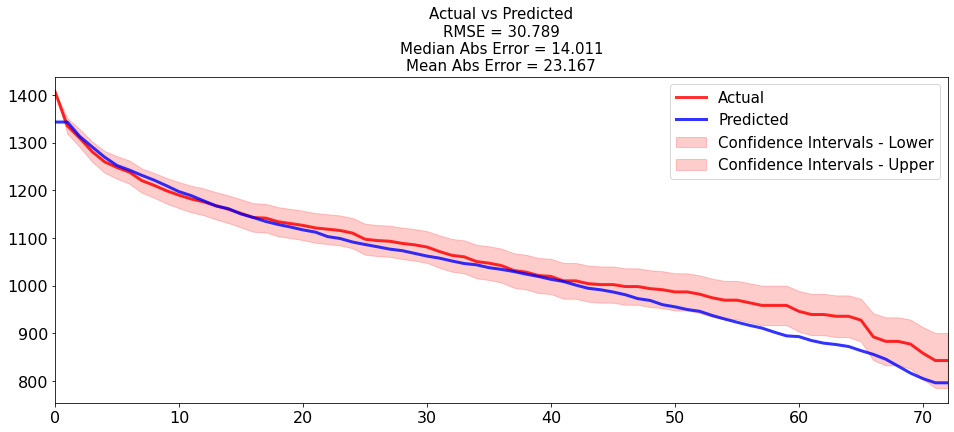

 
Expected vs. actual number of customers that churned


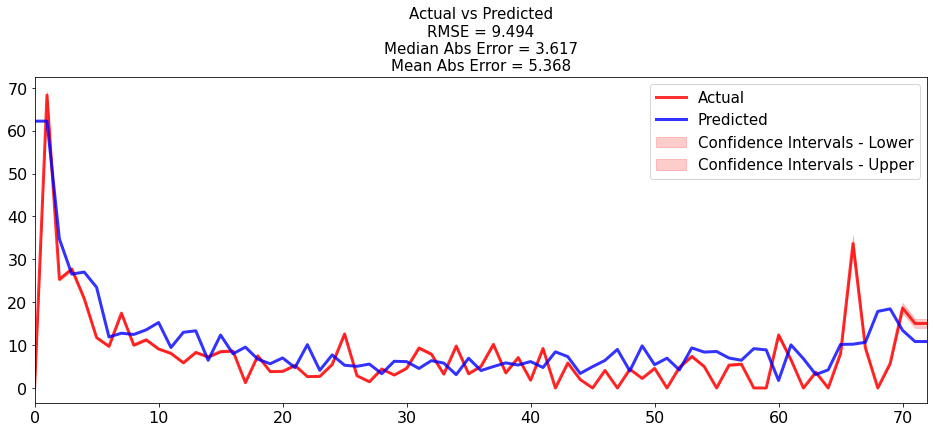

In [39]:
from pysurvival.utils.display import compare_to_actual

X_test = to_tests.drop(['Tenure','Churn'],axis=1)
T_test = to_tests['Tenure'].values
E_test = to_tests['Churn'].values

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model_rsf, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model_rsf, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()

## Conditional Survival Forest

In this section I will use the Conditional Survival Forest model to predict client churn. 

In order to perform a multivariable analysis as I did before, it is necessary first to one-hot encode all the categorical variables to get the information of every factor that my influence the churn of customers.

I will fit the model with 250 trees and I will print the concordance index while training.

In [40]:
#Trains the model by fitting it to the train subsample
model_csf = ConditionalSurvivalForestModel(num_trees = 250)
model_csf = model_csf.fit(to_train.drop(['Tenure','Churn'],axis=1),
                          to_train['Tenure'],
                          to_train['Churn'],
                          max_features = 'sqrt',
                          num_threads = -1,
                          importance_mode = 'normalized_permutation',
                          seed = 0,
                          save_memory=True)
    
C_index = concordance_index(model_csf, to_train.drop(['Tenure','Churn'],axis=1), to_train['Tenure'], to_train['Churn'])     
print('The concordance of the Conditional Survival Forest model is: ', round(C_index*100,2),'%')

The concordance of the Conditional Survival Forest model is:  88.33 %


I see that the concordance is of about 88.33% which is not bad either, but lower than the Cox and the Random Survival Forest models. In the following cell, I will evaluate the variable importance for the model, to spot the high risk factors.

Text(0, 0.5, 'Factors')

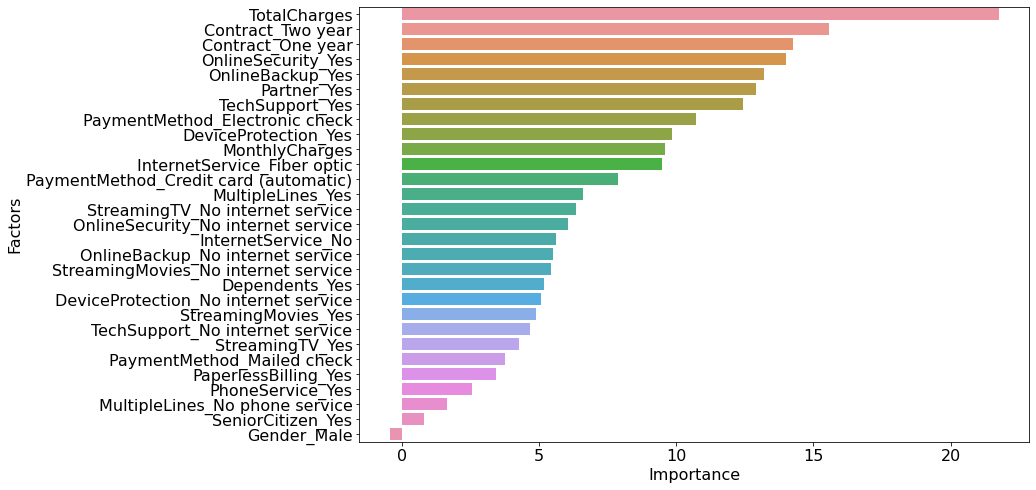

In [41]:
ax = sns.barplot(x='importance', y='feature', data=model_csf.variable_importance_table)
ax.set_xlabel('Importance')
ax.set_ylabel('Factors')

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [42]:
C_index = concordance_index(model_csf, to_tests.drop(['Tenure','Churn'],axis=1), to_tests['Tenure'], to_tests['Churn'])     
print('The concordance of the Conditional Survival Forest model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the Conditional Survival Forest model on the test subsample is:  88.2 %


The concordance index of the test subsample is similar than that of the training one, showing that the model is not overfitted.

### Comparison to the actual testing data

I will test the predictive power of the model by comparing the time series of the actual and predicted number of customers that churned, for each time t.

Expected vs. actual number of customers at risk of churning


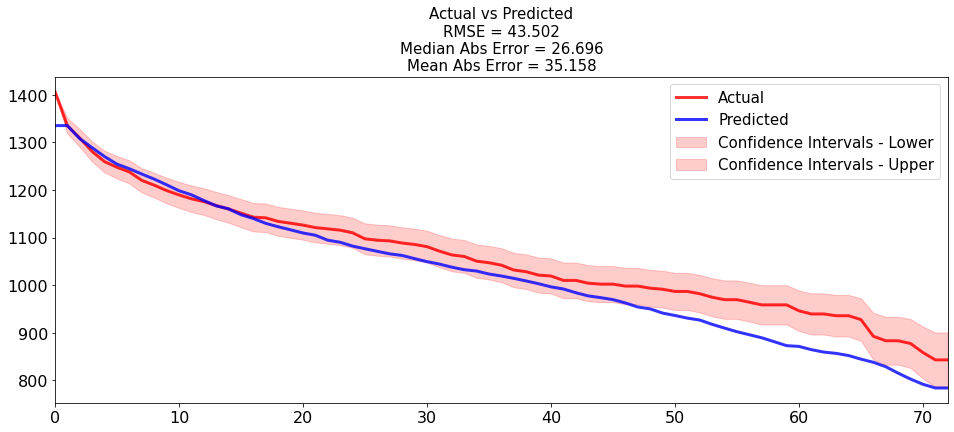

 
Expected vs. actual number of customers that churned


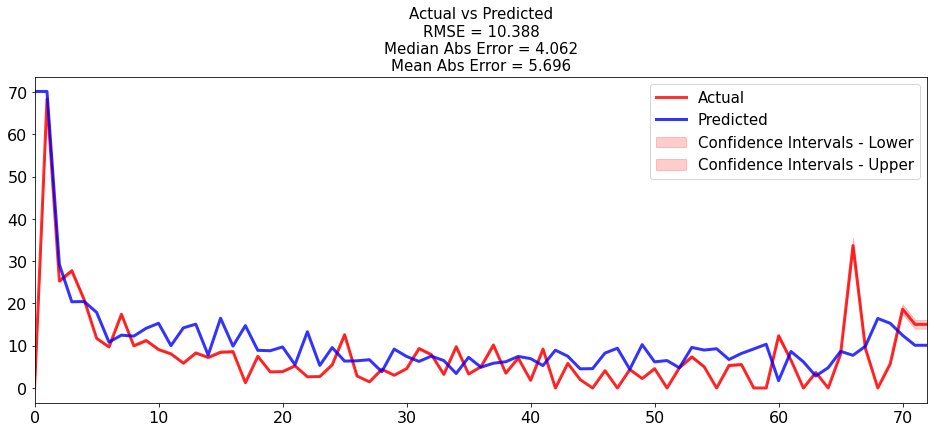

In [44]:
from pysurvival.utils.display import compare_to_actual

X_test = to_tests.drop(['Tenure','Churn'],axis=1)
T_test = to_tests['Tenure'].values
E_test = to_tests['Churn'].values

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model_csf, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model_csf, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()

## Extra Survival Trees

In this section I will use the Extra Survival Trees model to predict client churn.

In order to perform a multivariable analysis as I did before, it is necessary first to one-hot encode all the categorical variables to get the information of every factor that my influence the churn of customers.

I will fit the model with 250 trees and I will print the concordance index while training.

In [45]:
#Trains the model by fitting it to the train subsample
model_est = ExtraSurvivalTreesModel(num_trees = 250)
model_est = model_est.fit(to_train.drop(['Tenure','Churn'],axis=1),
                          to_train['Tenure'],
                          to_train['Churn'],
                          max_features = 'sqrt',
                          num_threads = -1,
                          importance_mode = 'normalized_permutation',
                          seed = 0,
                          save_memory=True)
    
C_index = concordance_index(model_est, to_train.drop(['Tenure','Churn'],axis=1), to_train['Tenure'], to_train['Churn'])     
print('The concordance of the Extra Survival Trees model is: ', round(C_index*100,2),'%')

The concordance of the Extra Survival Trees model is:  87.7 %


I see that the concordance is of about 87.70% which is not bad either, but lower than the previous models. In the following cell, I will evaluate the variable importance for the model, to spot the high risk factors.

Text(0, 0.5, 'Factors')

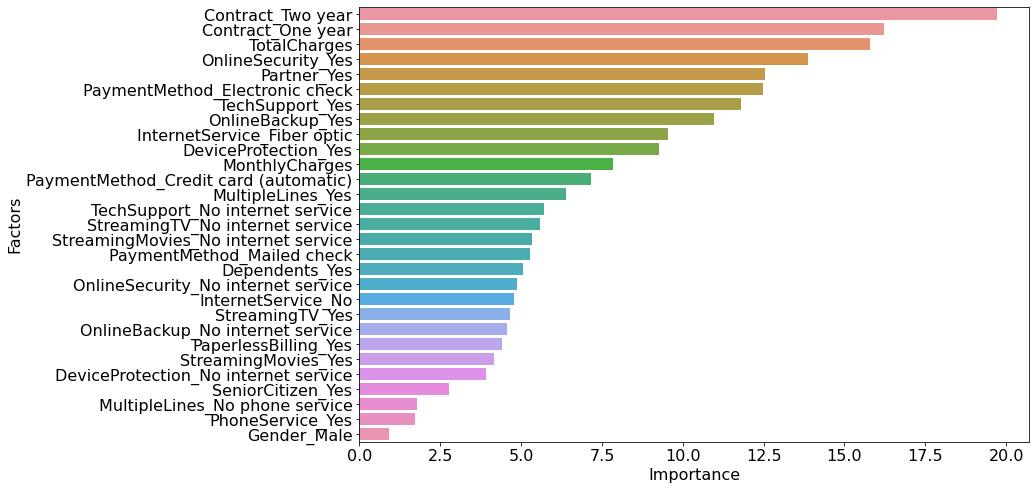

In [46]:
ax = sns.barplot(x='importance', y='feature', data=model_est.variable_importance_table)
ax.set_xlabel('Importance')
ax.set_ylabel('Factors')

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [47]:
C_index = concordance_index(model_est, to_tests.drop(['Tenure','Churn'],axis=1), to_tests['Tenure'], to_tests['Churn'])     
print('The concordance of the Extra Survival Trees model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the Extra Survival Trees model on the test subsample is:  87.6 %


The concordance index of the test subsample is similar than that of the training one, showing that the model is not overfitted.

### Comparison to the actual testing data

I will test the predictive power of the model by comparing the time series of the actual and predicted number of customers that churned, for each time t.

Expected vs. actual number of customers at risk of churning


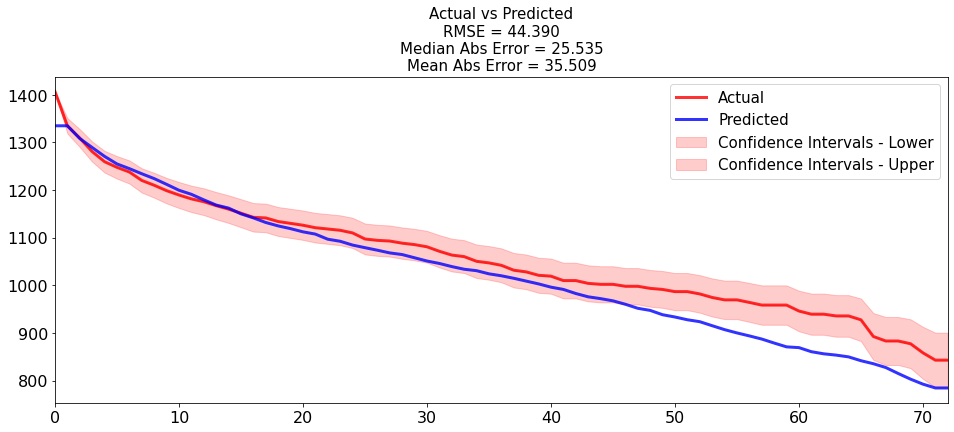

 
Expected vs. actual number of customers that churned


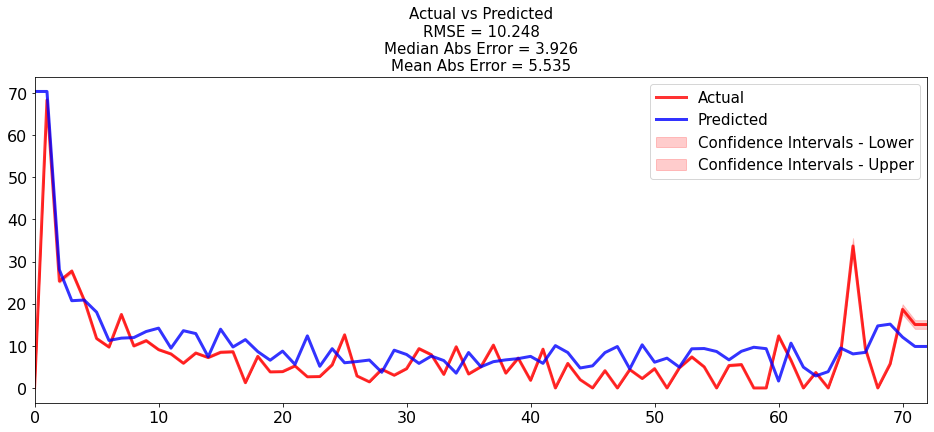

In [48]:
from pysurvival.utils.display import compare_to_actual

X_test = to_tests.drop(['Tenure','Churn'],axis=1)
T_test = to_tests['Tenure'].values
E_test = to_tests['Churn'].values

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model_est, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model_est, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()

## Meta Classifier Boosting

In this section I will build a Meta Classifier using the Boosting technique. Using the Random Survival Forest, Conditional Survival Forest and Extra Survival Trees as base learner, I will combine them as boosting and with another Random Survival Forest as the meta model. For all the models, I will use the same number of trees 250.

In [51]:
training = to_train.copy()

#Phase one training
model_boost_1 = RandomSurvivalForestModel(num_trees = 250)
model_boost_1 = model_boost_1.fit(training.drop(["Tenure","Churn"],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  weights = None,
                                  importance_mode = 'normalized_permutation',
                                  seed = 42,
                                  save_memory=True)
training['risk_1'] = model_boost_1.predict_risk(training.drop(["Tenure","Churn"],axis=1))

#Phase two training
model_boost_2 = ConditionalSurvivalForestModel(num_trees = 250)
model_boost_2 = model_boost_2.fit(training.drop(["Tenure","Churn"],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  importance_mode = 'normalized_permutation',
                                  save_memory=True)
training['risk_2'] = model_boost_2.predict_risk(training.drop(["Tenure","Churn"],axis=1))
            
#Phase three training
model_boost_3 = ExtraSurvivalTreesModel(num_trees = 250)
model_boost_3 = model_boost_3.fit(training.drop(["Tenure","Churn"],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  importance_mode = 'normalized_permutation',
                                  save_memory=True)
training['risk_3'] = model_boost_3.predict_risk(training.drop(["Tenure","Churn"],axis=1))

# Final phase training
model_boost = RandomSurvivalForestModel(num_trees = 250)
model_boost = model_boost.fit(training.drop(["Tenure","Churn"],axis=1),
                              training["Tenure"],
                              training["Churn"],
                              max_features = 'sqrt',
                              num_threads = -1,
                              importance_mode = 'normalized_permutation',
                              save_memory=True)

C_index = concordance_index(model_boost, training.drop(['Tenure','Churn'],axis=1), training['Tenure'], training['Churn'])     
print('The concordance of the MetaBoost model is: ', round(C_index*100,2),'%')

The concordance of the MetaBoost model is:  89.57 %


I see that the concordance is of about 89.57% which is slighlty better than the base learners, but still lower than the Cox model. In the following cell, I will evaluate the variable importance for the model, to spot the high risk factors.

Text(0, 0.5, 'Factors')

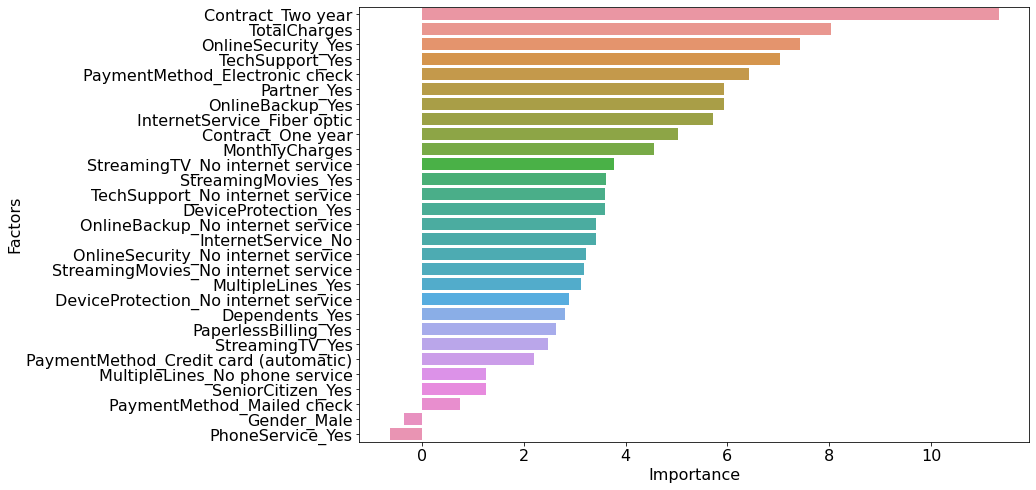

In [53]:
ax = sns.barplot(x='importance', y='feature', data=model_boost.variable_importance_table.iloc[3:])
ax.set_xlabel('Importance')
ax.set_ylabel('Factors')

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [54]:
testing = to_tests.copy()
testing['risk_1'] = model_boost_1.predict_risk(testing.drop(["Tenure","Churn"],axis=1))
testing['risk_2'] = model_boost_2.predict_risk(testing.drop(["Tenure","Churn"],axis=1))
testing['risk_3'] = model_boost_3.predict_risk(testing.drop(["Tenure","Churn"],axis=1))
        
C_index = concordance_index(model_boost, testing.drop(['Tenure','Churn'],axis=1), testing['Tenure'], testing['Churn'])     
print('The concordance of the MetaBoost model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the MetaBoost model on the test subsample is:  89.35 %


The concordance index of the test subsample is similar than that of the training one, showing that the model is not overfitted.

### Comparison to the actual testing data
I will test the predictive power of the model by comparing the time series of the actual and predicted number of customers that churned, for each time t.

Expected vs. actual number of customers at risk of churning


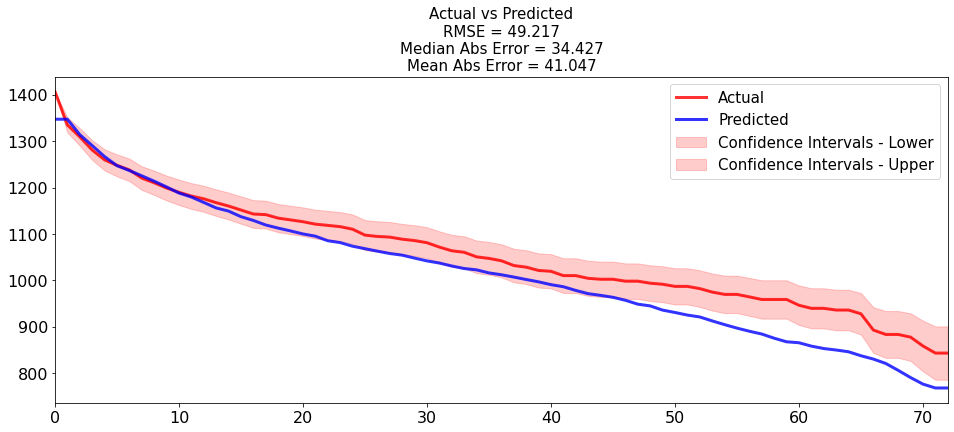

 
Expected vs. actual number of customers that churned


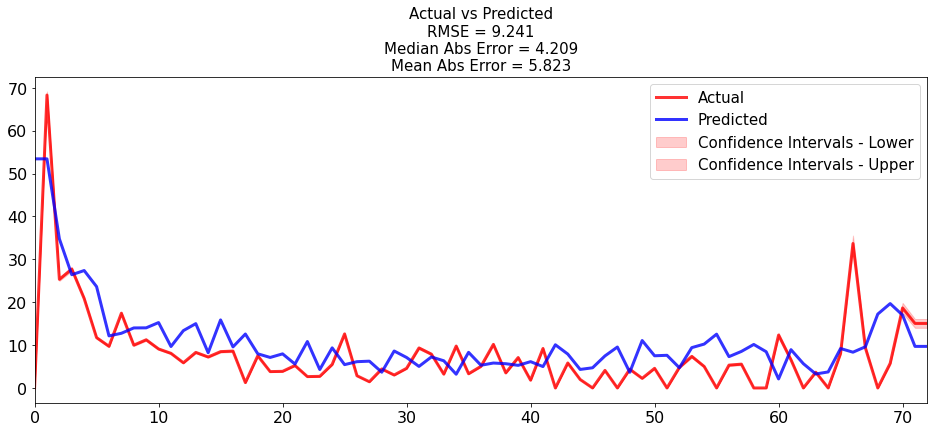

In [56]:
from pysurvival.utils.display import compare_to_actual

X_test = testing.drop(['Tenure','Churn'],axis=1)
T_test = testing['Tenure'].values
E_test = testing['Churn'].values

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model_boost, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model_boost, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()

## Meta Classifier Stacking

In this section I will build a Meta Classifier using the Stacking technique. Using the Random Survival Forest, Conditional Survival Forest and Extra Survival Trees as base learner, I will combine them as stacking and with another Random Survival Forest as the meta model. For all the models, I will use the same number of trees 250.

In [58]:
training = to_train.copy()

#Phase one training
model_stack_1 = RandomSurvivalForestModel(num_trees = 250)
model_stack_1 = model_stack_1.fit(training.drop(["Tenure","Churn"],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  weights = None,
                                  importance_mode = 'normalized_permutation',
                                  seed = 42,
                                  save_memory=True)

training['risk_1'] = model_stack_1.predict_risk(training.drop(["Tenure","Churn"],axis=1))


#Phase two training
model_stack_2 = ConditionalSurvivalForestModel(num_trees = 250)
model_stack_2 = model_stack_2.fit(training.drop(["Tenure","Churn",'risk_1'],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  importance_mode = 'normalized_permutation',
                                  save_memory=True)

training['risk_2'] = model_stack_2.predict_risk(training.drop(["Tenure","Churn",'risk_1'],axis=1))


#Phase three training
model_stack_3 = ExtraSurvivalTreesModel(num_trees = 250)
model_stack_3 = model_stack_3.fit(training.drop(["Tenure","Churn",'risk_1','risk_2'],axis=1),
                                  training["Tenure"],
                                  training["Churn"],
                                  max_features = 'sqrt',
                                  num_threads = -1,
                                  importance_mode = 'normalized_permutation',
                                  save_memory=True)

training['risk_3'] = model_stack_3.predict_risk(training.drop(["Tenure","Churn",'risk_1','risk_2'],axis=1))


# Final phase training
model_stacking = RandomSurvivalForestModel(num_trees = 250)
model_stacking = model_stacking.fit(training.drop(["Tenure","Churn"],axis=1),
                                    training["Tenure"],
                                    training["Churn"],
                                    max_features = 'sqrt',
                                    num_threads = -1,
                                    importance_mode = 'normalized_permutation',
                                    save_memory=True)

C_index = concordance_index(model_stacking, training.drop(['Tenure','Churn'],axis=1), training['Tenure'], training['Churn'])     
print('The concordance of the MetaStack model is: ', round(C_index*100,2),'%')

The concordance of the MetaStack model is:  89.6 %


I see that the concordance is of about 89.6% which is slightly better than the MetaBoost, but still lower than the Cox model. In the following cell, I will evaluate the variable importance for the model, to spot the high risk factors.

Text(0, 0.5, 'Factors')

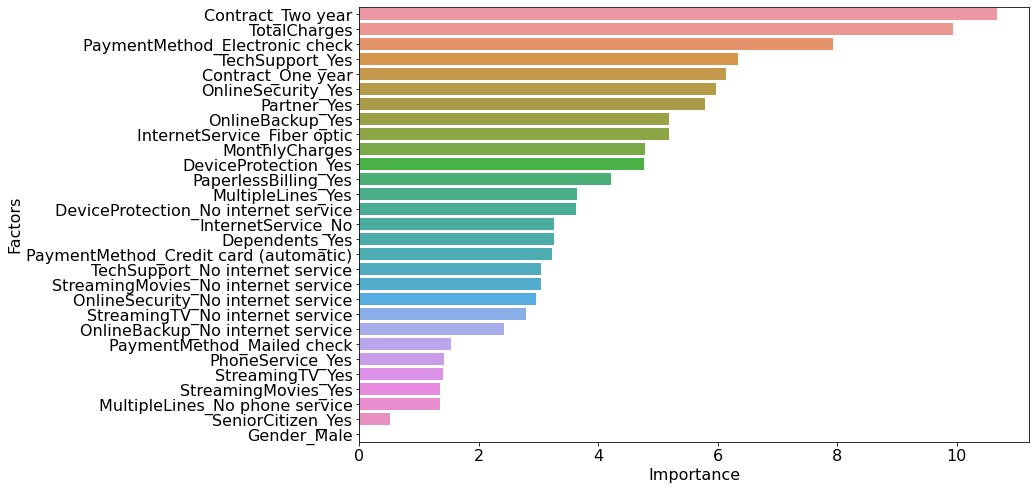

In [59]:
ax = sns.barplot(x='importance', y='feature', data=model_stacking.variable_importance_table.iloc[3:])
ax.set_xlabel('Importance')
ax.set_ylabel('Factors')

### Validation with the test subsample

I will compute now the concordance index with the test subsample and the predictions of the model on this subsample.

In [60]:
testing = to_tests.copy()
testing['risk_1'] = model_stack_1.predict_risk(testing.drop(["Tenure","Churn"],axis=1))
testing['risk_2'] = model_stack_2.predict_risk(testing.drop(["Tenure","Churn",'risk_1'],axis=1))
testing['risk_3'] = model_stack_3.predict_risk(testing.drop(["Tenure","Churn",'risk_1','risk_2'],axis=1))
        
C_index = concordance_index(model_stacking, testing.drop(['Tenure','Churn'],axis=1), testing['Tenure'], testing['Churn'])     
print('The concordance of the MetaStack model on the test subsample is: ', round(C_index*100,2),'%')

The concordance of the MetaStack model on the test subsample is:  89.41 %


The concordance index of the test subsample is similar than that of the training one, showing that the model is not overfitted.

### Comparison to the actual testing data

I will test the predictive power of the model by comparing the time series of the actual and predicted number of customers that churned, for each time t.

Expected vs. actual number of customers at risk of churning


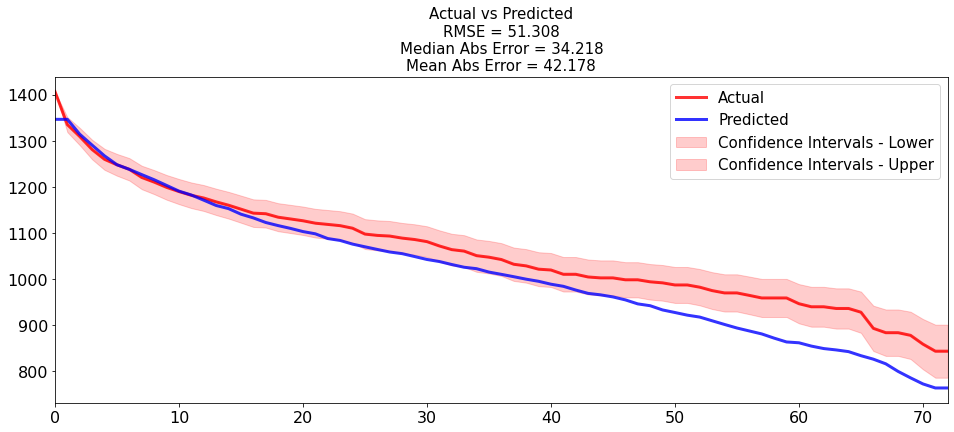

 
Expected vs. actual number of customers that churned


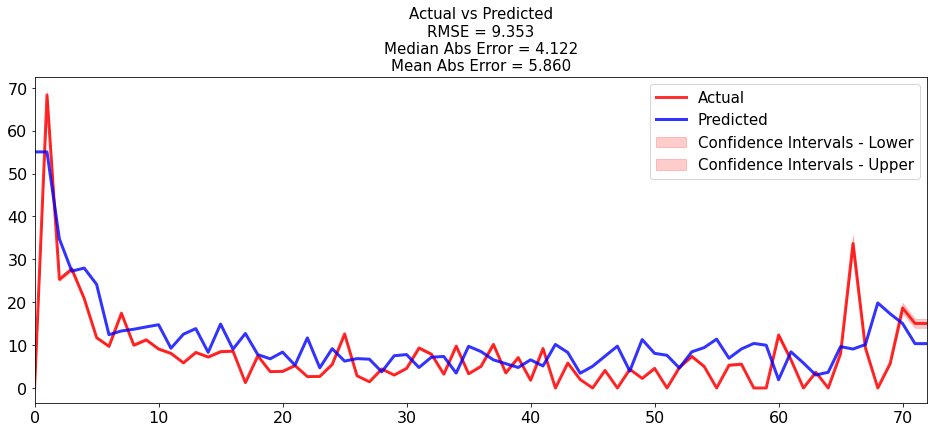

In [61]:
from pysurvival.utils.display import compare_to_actual

X_test = testing.drop(['Tenure','Churn'],axis=1)
T_test = testing['Tenure'].values
E_test = testing['Churn'].values

print('Expected vs. actual number of customers at risk of churning')
at_risk = compare_to_actual(model_stacking, X_test, T_test, E_test,
                            is_at_risk = True,  figure_size=(16, 6),
                            metrics = ['rmse', 'mean', 'median'])
plt.show()
print(' ')
print('Expected vs. actual number of customers that churned')
not_at_risk = compare_to_actual(model_stacking, X_test, T_test, E_test,
                                is_at_risk = False,  figure_size=(16, 6),
                                metrics = ['rmse', 'mean', 'median'])
plt.show()